### EUROCK 2024
## Capillary imbibition behaviour in volcanic rocks from Madeira Island, Portugal: preliminary results

`ID: 367`

-  Topic s: Rock properties, testing methods and site characterization
- Keywords: *Capillarity, petrophysical properties, basalt, lapilli tuff, multivariate analysis**

Nora Cueto Mendoza<sup>1,2</sup>, José Fernando Vieira de Sousa<sup>2</sup>, João Pedro Perneta<sup>2</sup>, Ronny Adrián Meza<sup>3</sup>

<sup>1</sup>University of Alicante, Spain; <sup>2</sup>Laboratório Regional de Engenharia Civil, Madeira Island, Portugal; <sup>3</sup>GIS4tech, Spin-Off of University of Granada, Granada, Spain.

---
This **Jupyter Notebook** comprehensively demonstrates the data processing methodologies and various **Machine Learning** techniques employed to analyze and visualize rock facies. Through a series of meticulously detailed steps, we will explore the preprocessing of raw data, feature engineering, model selection, and the application of advanced algorithms to uncover patterns and insights within the geological data. Additionally, this notebook includes a range of visualization tools to effectively present the results, enhancing our understanding of the underlying rock facies distribution and characteristics. Whether you are a geologist, data scientist, or researcher, this notebook serves as a valuable resource for applying machine learning in the field of geosciences.

In [1]:
#Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Librería para gráficos estadísticos
import math
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from pylab import rcParams
from xgboost import plot_importance
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.linear_model import LinearRegression #Modelo de regresión lineal
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
import tkinter
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
#import tpot
#from tpot import TPOTRegressor
import requests
from ipywidgets import Image
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error
import sklearn.linear_model as skl_lm
from sklearn.feature_selection import SequentialFeatureSelector
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
from variable_factor_map import pca_map #Genera el análisis de PCA
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import missingno as msno
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore", message="divide by zero encountered in scalar divide")
import os
import plotly.express as px
import qrcode
from IPython.display import Image, display
from PIL import Image as PilImage
import warnings
warnings.filterwarnings("ignore")
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

In [2]:
#Reading the Excel data file 
df = pd.read_excel('Base Datos Python EUROCK2024.xlsx', sheet_name = 'Python', header = 0)

In [3]:
#DataFrame visualization
df.head(5)

Sample          BDw          BDd         P           RD         TP  \
0   B1m2  2883.196681  2886.601673  1.483087  3063.457084   5.884215   
1   B2m2  2761.351302  2750.175719  2.273774  3049.707328   9.455203   
2   B3m3  2662.212261  2659.975528  6.619987  3047.011297  12.628737   
3   B4m2  2875.041871  2876.985192  1.206609  3070.055562   6.352123   
4   B5m2  2892.096748  2894.110707  1.208653  3077.149058   6.013758   

         Ab         C         Wn         Wd         UCS  
0  0.524007  1.143335  28.390684  28.307892  264.615120  
1  0.686876  1.693232  27.073848  26.970011  180.715461  
2  1.953146  4.466614  26.302127  26.085449  155.772015  
3  0.458163  1.117417  28.302031  28.213587  269.191533  
4  0.372596  1.192628  28.487279  28.381531  168.315913

## Generate descriptive statistics
Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. 

In [4]:
#Descriptive statistics using describe() function
np.round(df.describe(), 2)

BDw      BDd       P       RD     TP      Ab       C      Wn  \
count   108.00   108.00  108.00    77.00  77.00  108.00  107.00  108.00   
mean   2372.54  2353.52   12.99  3043.89  14.46    6.95   69.17   23.52   
std     581.66   601.04   11.95    47.03  15.55    7.32  125.12    5.59   
min    1448.65  1404.47    0.02  2952.74   0.82    0.03    0.07   14.24   
25%    1887.65  1858.73    0.74  3010.26   3.25    0.39    1.06   19.42   
50%    2404.82  2390.25   14.15  3043.99   5.88    5.09    8.26   24.05   
75%    2949.52  2943.19   23.86  3066.14  29.35   12.78   49.91   28.93   
max    3060.39  3179.32   30.03  3156.70  50.24   20.73  468.61   31.23   

           Wd     UCS  
count  108.00   83.00  
mean    23.08  162.02  
std      5.89  119.13  
min     13.77    5.97  
25%     18.23   36.68  
50%     23.44  168.32  
75%     28.86  260.22  
max     31.18  404.86

In this case, **BDw** and **BDd** have standard deviations with the same order of magnitude ($581.66$ and $601.04$). Since the difference between these standard deviations is not considerable and they are in the same order of magnitude, it could be concluded that the two variables have comparable variability.

Now, when it comes to relative importance in the context of correlation and collinearity, a correlation coefficient close to one indicates that the two variables are strongly correlated. Collinearity can affect the precise identification of the individual contribution of each variable in certain models.

In terms of "importance," both variables can be equally important depending on the context of the analysis. However, if importance is considered in the context of dimensionality reduction or elimination of redundant features, it may be preferred to retain the variable that provides unique information and is not simply replicated by the other.

In this sense, we will proceed to retain the variable BDw because, being closely correlated with BDd and having a standard deviation of the same order of magnitude, the use of one or the other will not affect the results.

In the case of **Wn** and **Wd** with standard deviations (std) of $5.59$ and $5.89$, respectively, and a correlation coefficient close to one, suggests that the two variables have comparable variability and are strongly correlated. In this context, selecting one variable over the other may be indifferent, as both provide similar information to the system.

## Missing data analysis
The Missingno library provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allow you to get a quick visual summary of the completeness (or lack thereof) of your dataset. 

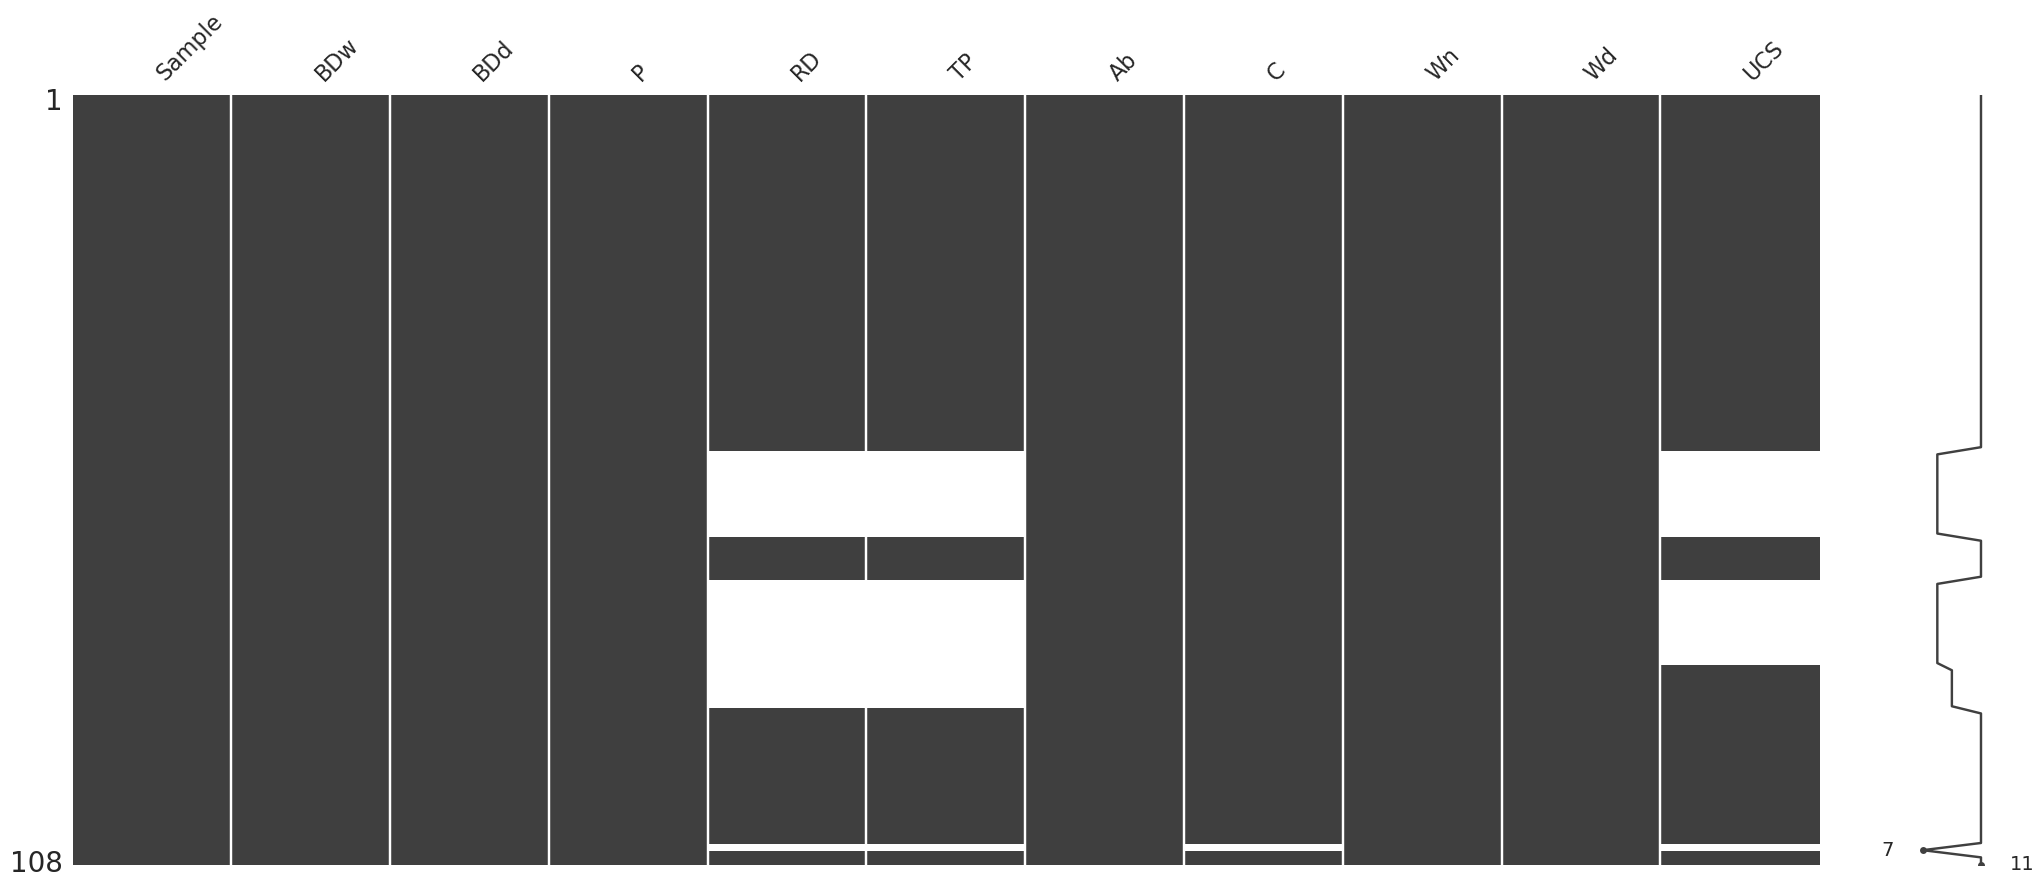

In [5]:
#Missing data analysis using Missingno library
plt.rcParams['font.family'] = 'DejaVu Sans'
msno.matrix(df);

The `msno.matrix` nullity matrix serves as a data-rich visualization tool, facilitating swift detection of patterns in data completeness.

The sparkline positioned at the top offers a concise summary of the overall data completeness profile, highlighting rows with the highest and lowest nullity within the dataset.

## Analysis of Variable Collinearity

The *Variance Inflation Factor (VIF)* is an essential tool in regression analysis and statistical modeling. While the correlation matrix is a useful tool for assessing linear relationships between variables, it does not provide a direct measure of multicollinearity, which is the presence of high correlations between two or more independent variables in a regression model. Multicollinearity can introduce biases, making the interpretation of the effects of each variable more challenging.

The VIF is advantageous in that it offers a quantitative measure of multicollinearity among the independent variables in a model. When the VIF is equal to or greater than $1$, it indicates the presence of multicollinearity, and a high VIF value suggests that the variable in question is strongly correlated with other variables in the model.

To extract variables that do not have multicollinearity, analysts often look for variables with low VIF values, typically below a predefined threshold, such as $5$ or $10$. Removing variables with high VIF can help improve the stability and accuracy of the model.

In [6]:
'''
Due to missing data in some variables, we will proceed to impute them. 
'''
# Missing data imputation using KNNImputer (construction of the imputer)
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='distance', metric='nan_euclidean')

# Impute missing values in the DataFrame.
df_imputed = imputer.fit_transform(df.iloc[:,1:])

# The result of KNNImputer is a NumPy array, so it needs to be converted back to a DataFrame
df_imputed = pd.DataFrame(df_imputed)
df_imputed.columns = df.iloc[:,1:].columns

In [7]:
#Construction of the Variance Inflation Factor
X = df_imputed.assign(const=1)
vif_data = pd.DataFrame()

vif_data["VIF"] = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

#"Including the variable name in the VIF output
vif_data.reset_index(inplace = True)
vif_data.columns = ['Variable', 'VIF']

## Variable Selection

To select a set of moderately correlated variables, a threshold of $10$ will be used, resulting in $2$ variables that are uncorrelated with the rest. In this regard, it can be observed that the variables **RD** and **UCS** are important variables because they are independent of the others.

In [8]:
#Extraction of variables that do not generate collinearity issues
umbral = 10
var_umbral = vif_data[vif_data["VIF"] < umbral]

#Construction of the variable list
var_vif = var_umbral.Variable.to_list()

#DataFrame containing variables with a VIF < 5 (Using the imputed DataFrame)
numeric_umbral = df_imputed[var_vif]

numeric_umbral.head(3)

RD         UCS
0  3063.457084  264.615120
1  3049.707328  180.715461
2  3047.011297  155.772015

## Variable Selection

Based on the previous analysis, a new DataFrame will be constructed, which will not contain the variable **BDd** because it is represented by the variable **BDw**. Likewise, the variable **Wn** will be removed because it will be represented by **Wd**. In the methodology, PCA is planned to be applied, which helps to remove any collinearity effect that may exist in the data, so no further alterations will be made to the original DataFrame.

In [9]:
#New DF
df_2 = pd.concat([df['Sample'], df_imputed[['BDw','P','RD','TP','Ab','C','Wd','UCS']]], axis = 1)
df_2.head()

Sample          BDw         P           RD         TP        Ab         C  \
0   B1m2  2883.196681  1.483087  3063.457084   5.884215  0.524007  1.143335   
1   B2m2  2761.351302  2.273774  3049.707328   9.455203  0.686876  1.693232   
2   B3m3  2662.212261  6.619987  3047.011297  12.628737  1.953146  4.466614   
3   B4m2  2875.041871  1.206609  3070.055562   6.352123  0.458163  1.117417   
4   B5m2  2892.096748  1.208653  3077.149058   6.013758  0.372596  1.192628   

          Wd         UCS  
0  28.307892  264.615120  
1  26.970011  180.715461  
2  26.085449  155.772015  
3  28.213587  269.191533  
4  28.381531  168.315913

In [10]:
#Extract the first letter of each row to construct the Facies column
df_2['Facies'] = df_2['Sample'].str[0]

In [11]:
#A dictionary is constructed to map each sample and label it
mapeo = {'B': 'Basalts', 'L': 'Lapillistones '} 

#Apply the mapping to the 'primera_letra' column
df_2['Facies'] = df_2['Facies'].map(mapeo)

<Figure size 1600x800 with 0 Axes>

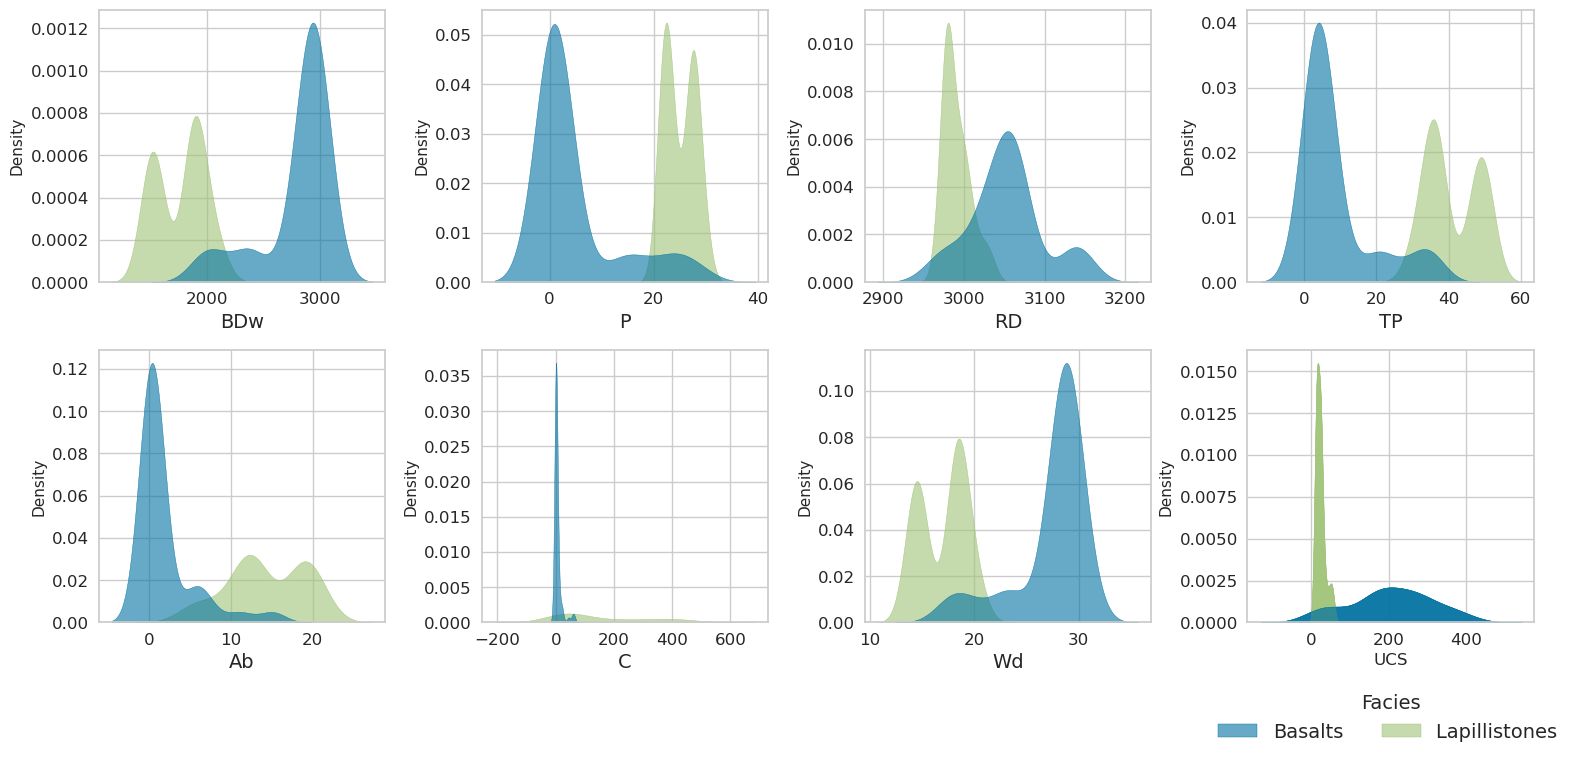

In [12]:
# Hide Input
# Create subplots
plt.figure(figsize=(16, 8))
variable = list(df_2.iloc[:, 1:-1].columns)
n_variables = len(variable)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    if i < n_variables:
        j = variable[i]
        sns.kdeplot(data=df_2, x=j, hue="Facies", fill=True, alpha=0.6, ax=ax, warn_singular=False, legend=False)
        ax.set_xlabel(j, fontsize=14)
        ax.tick_params(axis='both', which='major', labelsize=12)
        ax.grid(True)
    else:
        ax.axis('on')

# Create a final subplot for the last graph
last_subplot = plt.subplot(2, 4, n_variables)
sns.kdeplot(data=df_2, x='UCS', hue="Facies", fill=True, alpha=0.6, ax=last_subplot, warn_singular=False)
last_subplot.set_xlabel('UCS', fontsize=14)
last_subplot.tick_params(axis='both', which='major', labelsize=14)
last_subplot.grid(True)

# Adjust margins and spacing between subplots
plt.tight_layout()

# Create an additional subplot for the final graph
last_subplot = plt.subplot(2, 4, n_variables)
sns.kdeplot(data=df_2, x='UCS', hue="Facies", fill=True, alpha=0.6, ax=last_subplot, warn_singular=False)
last_subplot.set_xlabel('UCS', fontsize=12)
last_subplot.tick_params(axis='both', which='major', labelsize=12)
last_subplot.grid(True)

# Move the legend outside of all the plots, below them
sns.move_legend(last_subplot, loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=3, fontsize=14, 
                frameon=False, title_fontsize = 14)

# Adjust margins and spacing between subplots
plt.tight_layout();
plt.show();

The density plots reveal a distinct behavior between Lapillistones and Basalts rocks. Lapillistones rocks typically display a bimodal distribution, whereas Basalts rocks do not exhibit this pattern. Additionally, there are differences in the median of each property between the two types of rocks. This distinction is significant because it suggests the potential for separation of the two samples using unsupervised machine learning methods.

## Grouped Boxplots by Category

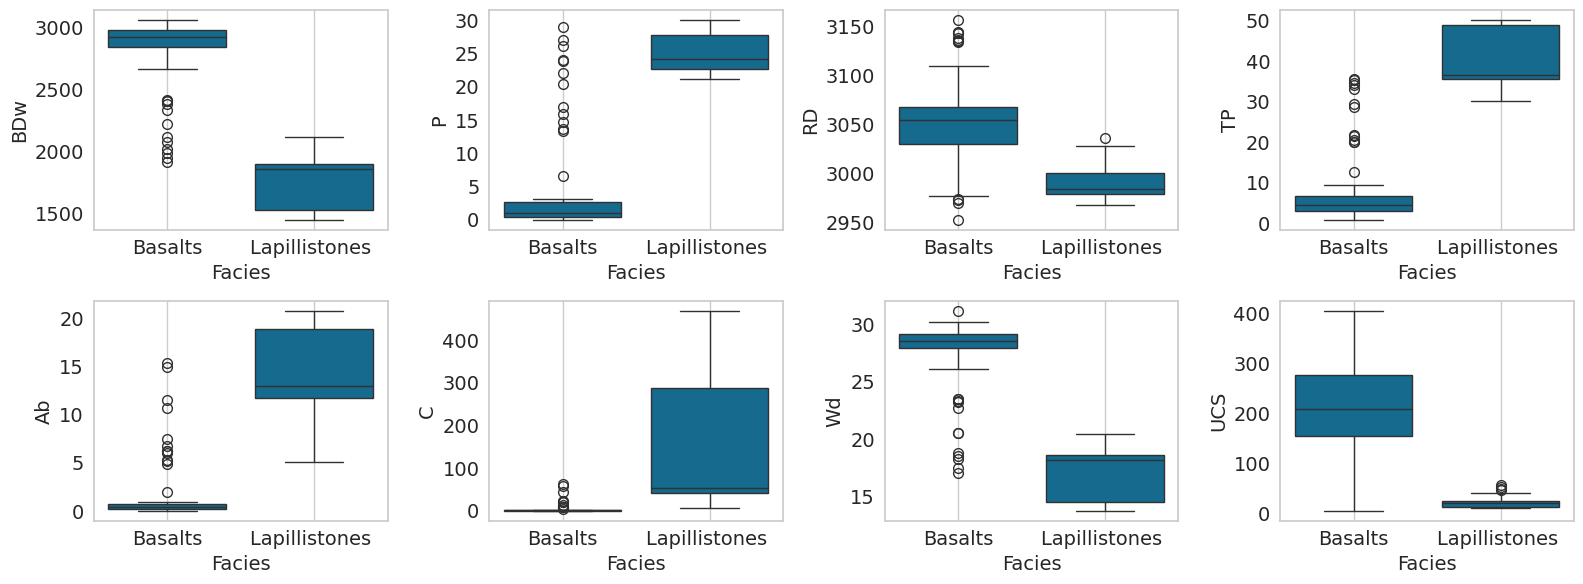

In [13]:
# Hide Input
# Boxplots
data = df_2.iloc[:,1:-1]

# Crear el gráfico de boxplots en un subplot de 3x4
plt.figure(figsize=(16, 6))
variable = list(data.columns)


for i, j in enumerate(variable):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=data, x=df_2["Facies"], y=j)
    plt.ylabel(j)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # Adjust the font size of the axis titles
    plt.xlabel('Facies', fontsize=14)  # Adjust the font size and title of the x-axis
    plt.ylabel(j,fontsize=14)  # Adjust the font size and title of the y-axis
    plt.grid()

# Adjust the margins and spacing between subplots
plt.tight_layout()

# Show the plot
#plt.grid()
# Save the graph
plt.savefig('boxplots.png', bbox_inches='tight')
plt.show()

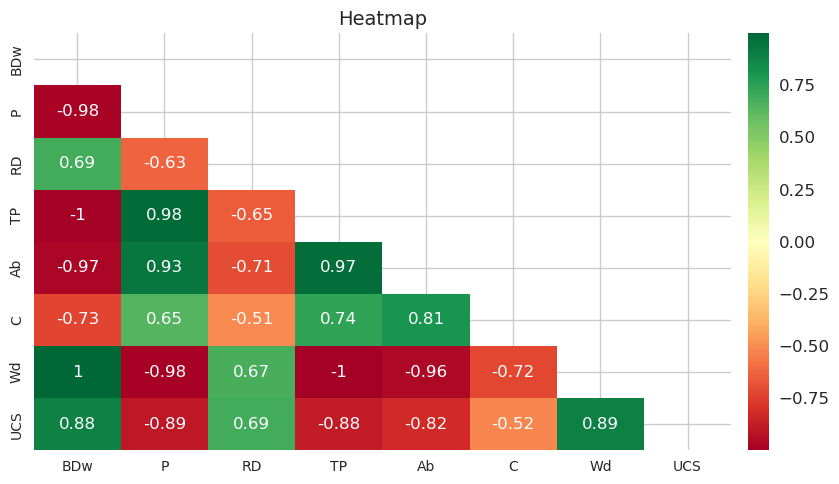

In [14]:
# Hide Input
# Correlaton Matrix
corr = df_2.iloc[:,1:-1].corr()
matrix = np.triu(corr)

plt.subplots(figsize=(9, 5))

# A mask is used to construct the lower triangle.
plt.title('Heatmap', fontsize=14)

# Create the heatmap
ax = sns.heatmap(corr, annot=True, mask=matrix, cmap="RdYlGn", cbar_kws={"orientation": "vertical", "pad": 0.02})

# Adjust the font size of the color bar.
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

plt.tight_layout()  # Automatic adjustment of the plots
plt.xticks(fontsize=10)  # Font size of the ticks on the x-axis
plt.yticks(fontsize=10)  # Font size of the ticks on the y-axis.

# Save the heatmap
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

In the heatmap, it can be observed that the variables **RD** and **UCS** have correlation coefficients below the threshold of $0.95$, which is why they appear as variables with a moderate correlation index when evaluated using VIF.

## Outlier detections
This function detects outliers in a DataFrame using two different methods: IQR (Interquartile Range) and Z-score. 

- `detect_outliers_iqr`: Calculates the IQR for each column, defines the lower and upper bounds based on a threshold, and identifies outliers in each column. It then combines the results into a boolean DataFrame indicating the presence of outliers in each row.
- `detect_outliers_zscore`: Calculates the Z-score for each column, identifies outliers in each column, and combines the results into a boolean DataFrame indicating the presence of outliers in each row.

The code then combines the results of both outlier detections, filters the original DataFrame to obtain only the rows containing outliers, and prints the resulting DataFrame with the rows containing outliers.

In [15]:
#This function detects outliers in a DataFrame using two different methods: IQR (Interquartile Range) and Z-score
def detect_outliers_iqr(df_2, threshold=1.25):
    # Calculating the interquartile range (IQR) for each column
    Q1 = df_2.iloc[:,1:-1].quantile(0.1)
    Q3 = df_2.iloc[:,1:-1].quantile(0.9)
    IQR = Q3 - Q1
    
    # Defining the limits to identify outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    # Detecting outliers in each column.
    outliers = (df_2.iloc[:,1:-1] < lower_bound) | (df_2.iloc[:,1:-1] > upper_bound)
    
    # Combine the results into a boolean DataFrame indicating the presence of outliers in each row
    return outliers.any(axis=1)

def detect_outliers_zscore(df_2, threshold=3):
    # Calculate the Z-score for each column.
    z_scores = np.abs((df_2.iloc[:,1:-1] - df_2.iloc[:,1:-1].mean()) / df_2.iloc[:,1:-1].std())
    
    # Detecta outliers en cada columna
    outliers = z_scores > threshold
    
    # Combina los resultados en un DataFrame booleano que indica la presencia de outliers en cada fila.
    return outliers.any(axis=1)

if __name__ == "__main__":
    
    # Detecting outliers using IQR
    outliers_iqr = detect_outliers_iqr(df_2.iloc[:,1:-1])
    
    # Detecting outliers using Z-score.
    outliers_zscore = detect_outliers_zscore(df_2.iloc[:,1:-1])
    
    # Combining the results of both outlier detections.
    outliers_combined = outliers_iqr | outliers_zscore
    
    # Filter the original DataFrame to obtain only the rows containing outliers
    df_outliers = df_2.iloc[:,1:-1][outliers_combined]
    
    # Print the DataFrame with the rows containing outliers
    display(np.round(df_outliers, 2))

BDw      P       RD     TP     Ab       C     Wd    UCS
56  1521.5  27.01  2979.68  49.56  18.59  447.70  14.51  12.82
64  1484.4  28.63  2983.02  50.24  20.72  468.61  14.22  12.30

In [16]:
#List of rows to be removed from the original DataFrame
outliers = df_outliers.index.to_list()

new_df = df_2.drop(outliers).reset_index(drop=True)

In [17]:
#The new DataFrame is backed up for future use.
new_df.to_excel('EUROCK2024_without_Outliers.xlsx', index = False)

## Grouped boxplots by category without outliers
The graph below displays boxplots of the various variables, excluding outliers.

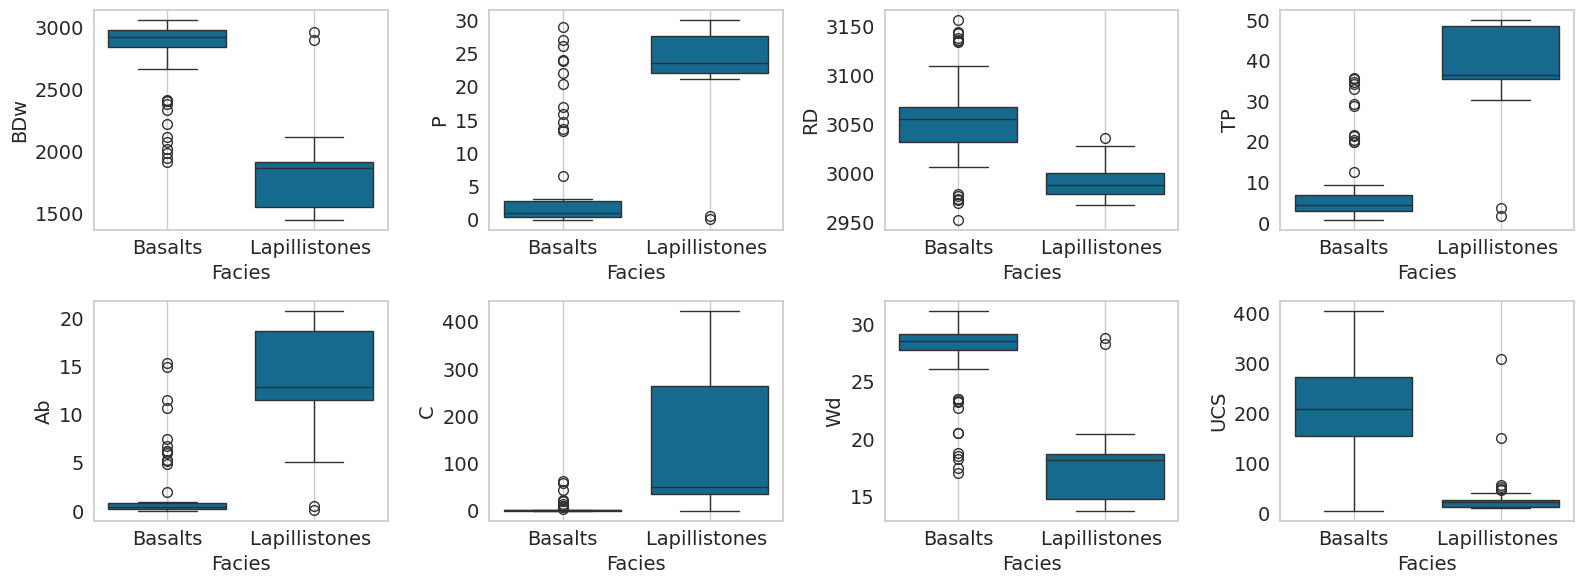

In [18]:
# Hide Input
# Boxplots
data = new_df.iloc[:,1:-1]

# Create the boxplot plot in a 3x4 subplot
plt.figure(figsize=(16, 6))
variable = list(data.columns)


for i, j in enumerate(variable):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=data, x=df_2["Facies"], y=j)
    plt.ylabel(j)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # Adjust the font size of the axis titles
    plt.xlabel('Facies', fontsize=14)  # Adjust the font size and title of the x-axis
    plt.ylabel(j,fontsize=14)  # Adjust the font size and title of the y-axis
    plt.grid()

# Adjust the margins and spacing between subplots.
plt.tight_layout()

# Show thel plot
#plt.grid()
# Save the boxplot
plt.savefig('boxplots.png', bbox_inches='tight')
plt.show()

## Cross-Correlation plot

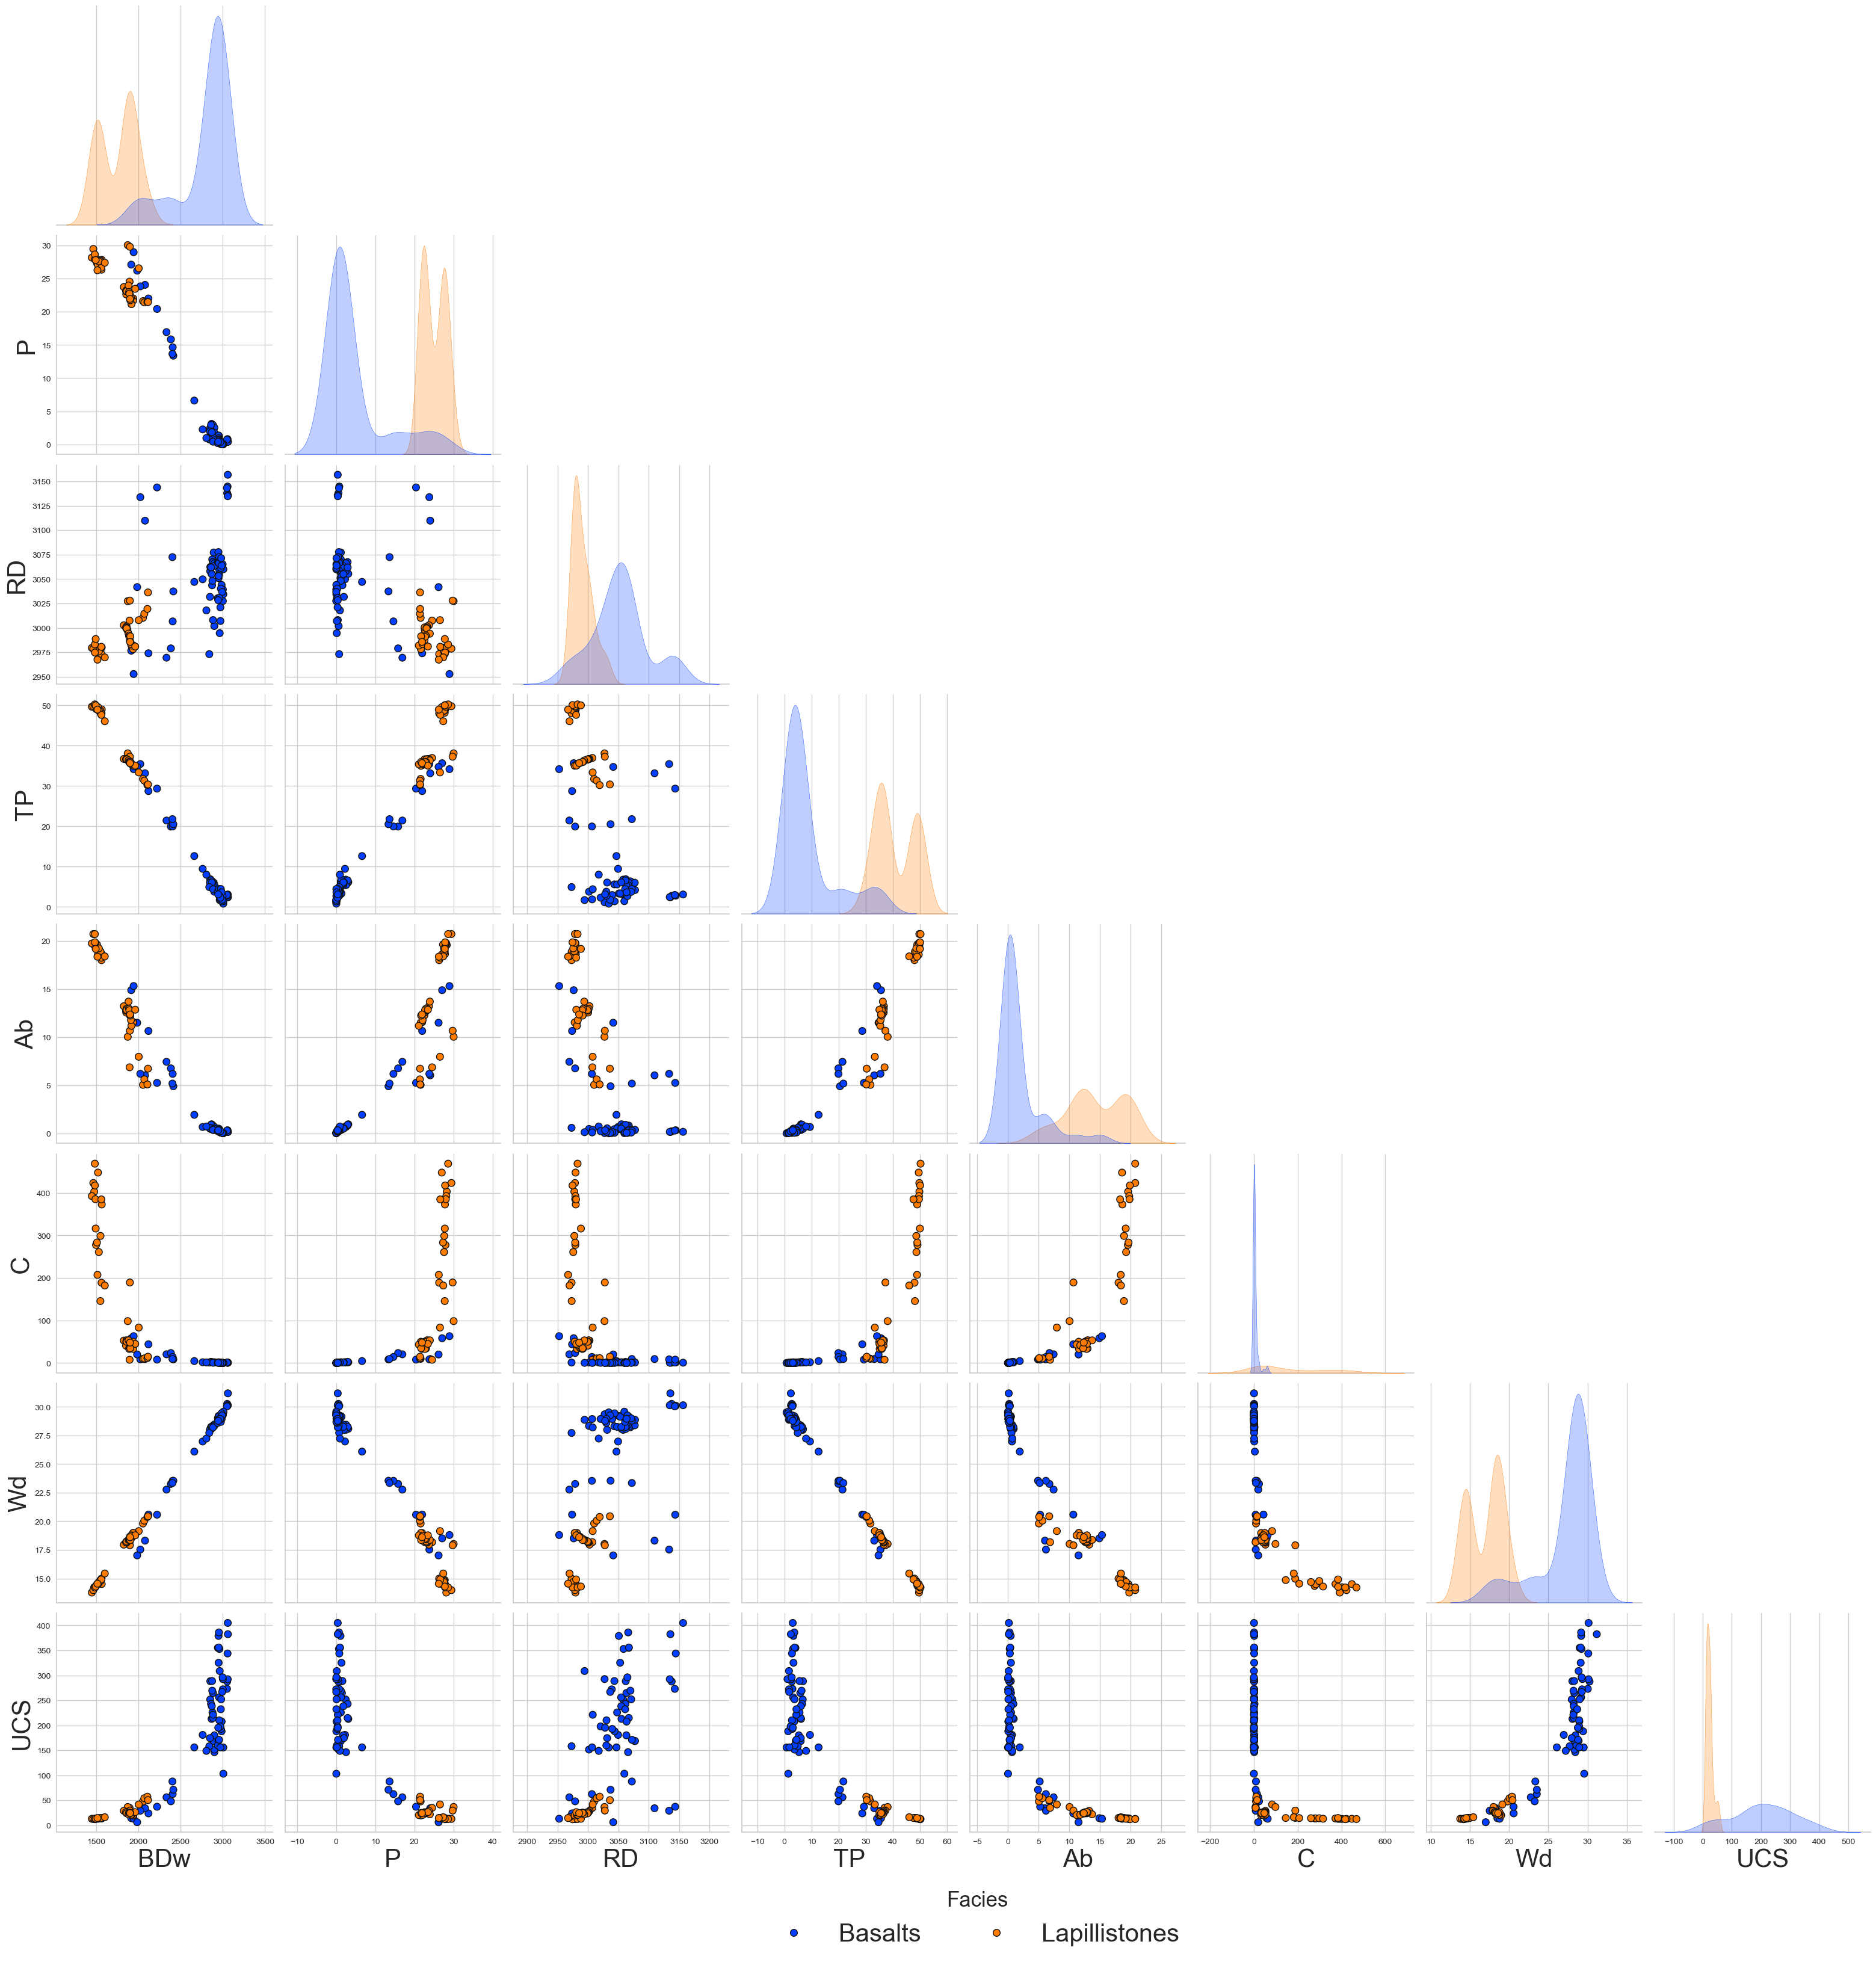

In [19]:
# Hide Input
# Construction of the cross-correlation plot.
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})

with sns.plotting_context(rc={"axes.labelsize":30}):
    g = sns.pairplot(df_2.iloc[:,1:], corner=True, hue='Facies', palette='bright', markers='o', 
                     height=4, plot_kws={"s": 70, "alpha": 1.0, 'lw': 1.0, 'edgecolor': 'k'})

sns.move_legend(g, "lower center",bbox_to_anchor=(0.5, -0.035), ncol=3, 
                title='Facies', frameon=False, fontsize=30, title_fontsize = 25)



# Adjust the font size of the numbering on the X and Y axes
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Show the graph
plt.show()

The correlation graphs reveal various relationships among the variables. For instance, variables such as P, TP, Ab, and Wd demonstrate a linear correlation with BDw. Additionally, a logarithmic correlation is evident between C and UCS in relation to BDw, as well as between C and UCS in relation to P. However, certain variables do not exhibit a distinct pattern, such as RD in relation to P, or TP, Ab, Wd, and UCS in relation to RD.

## Pairplot
The pairplot graph is a useful visualization tool for exploring relationships between pairs of variables in a dataset. It displays scatterplots for each pair of variables along the diagonal, histograms of each variable's distribution along the diagonal, and scatterplots of variable pairs in the lower triangle.

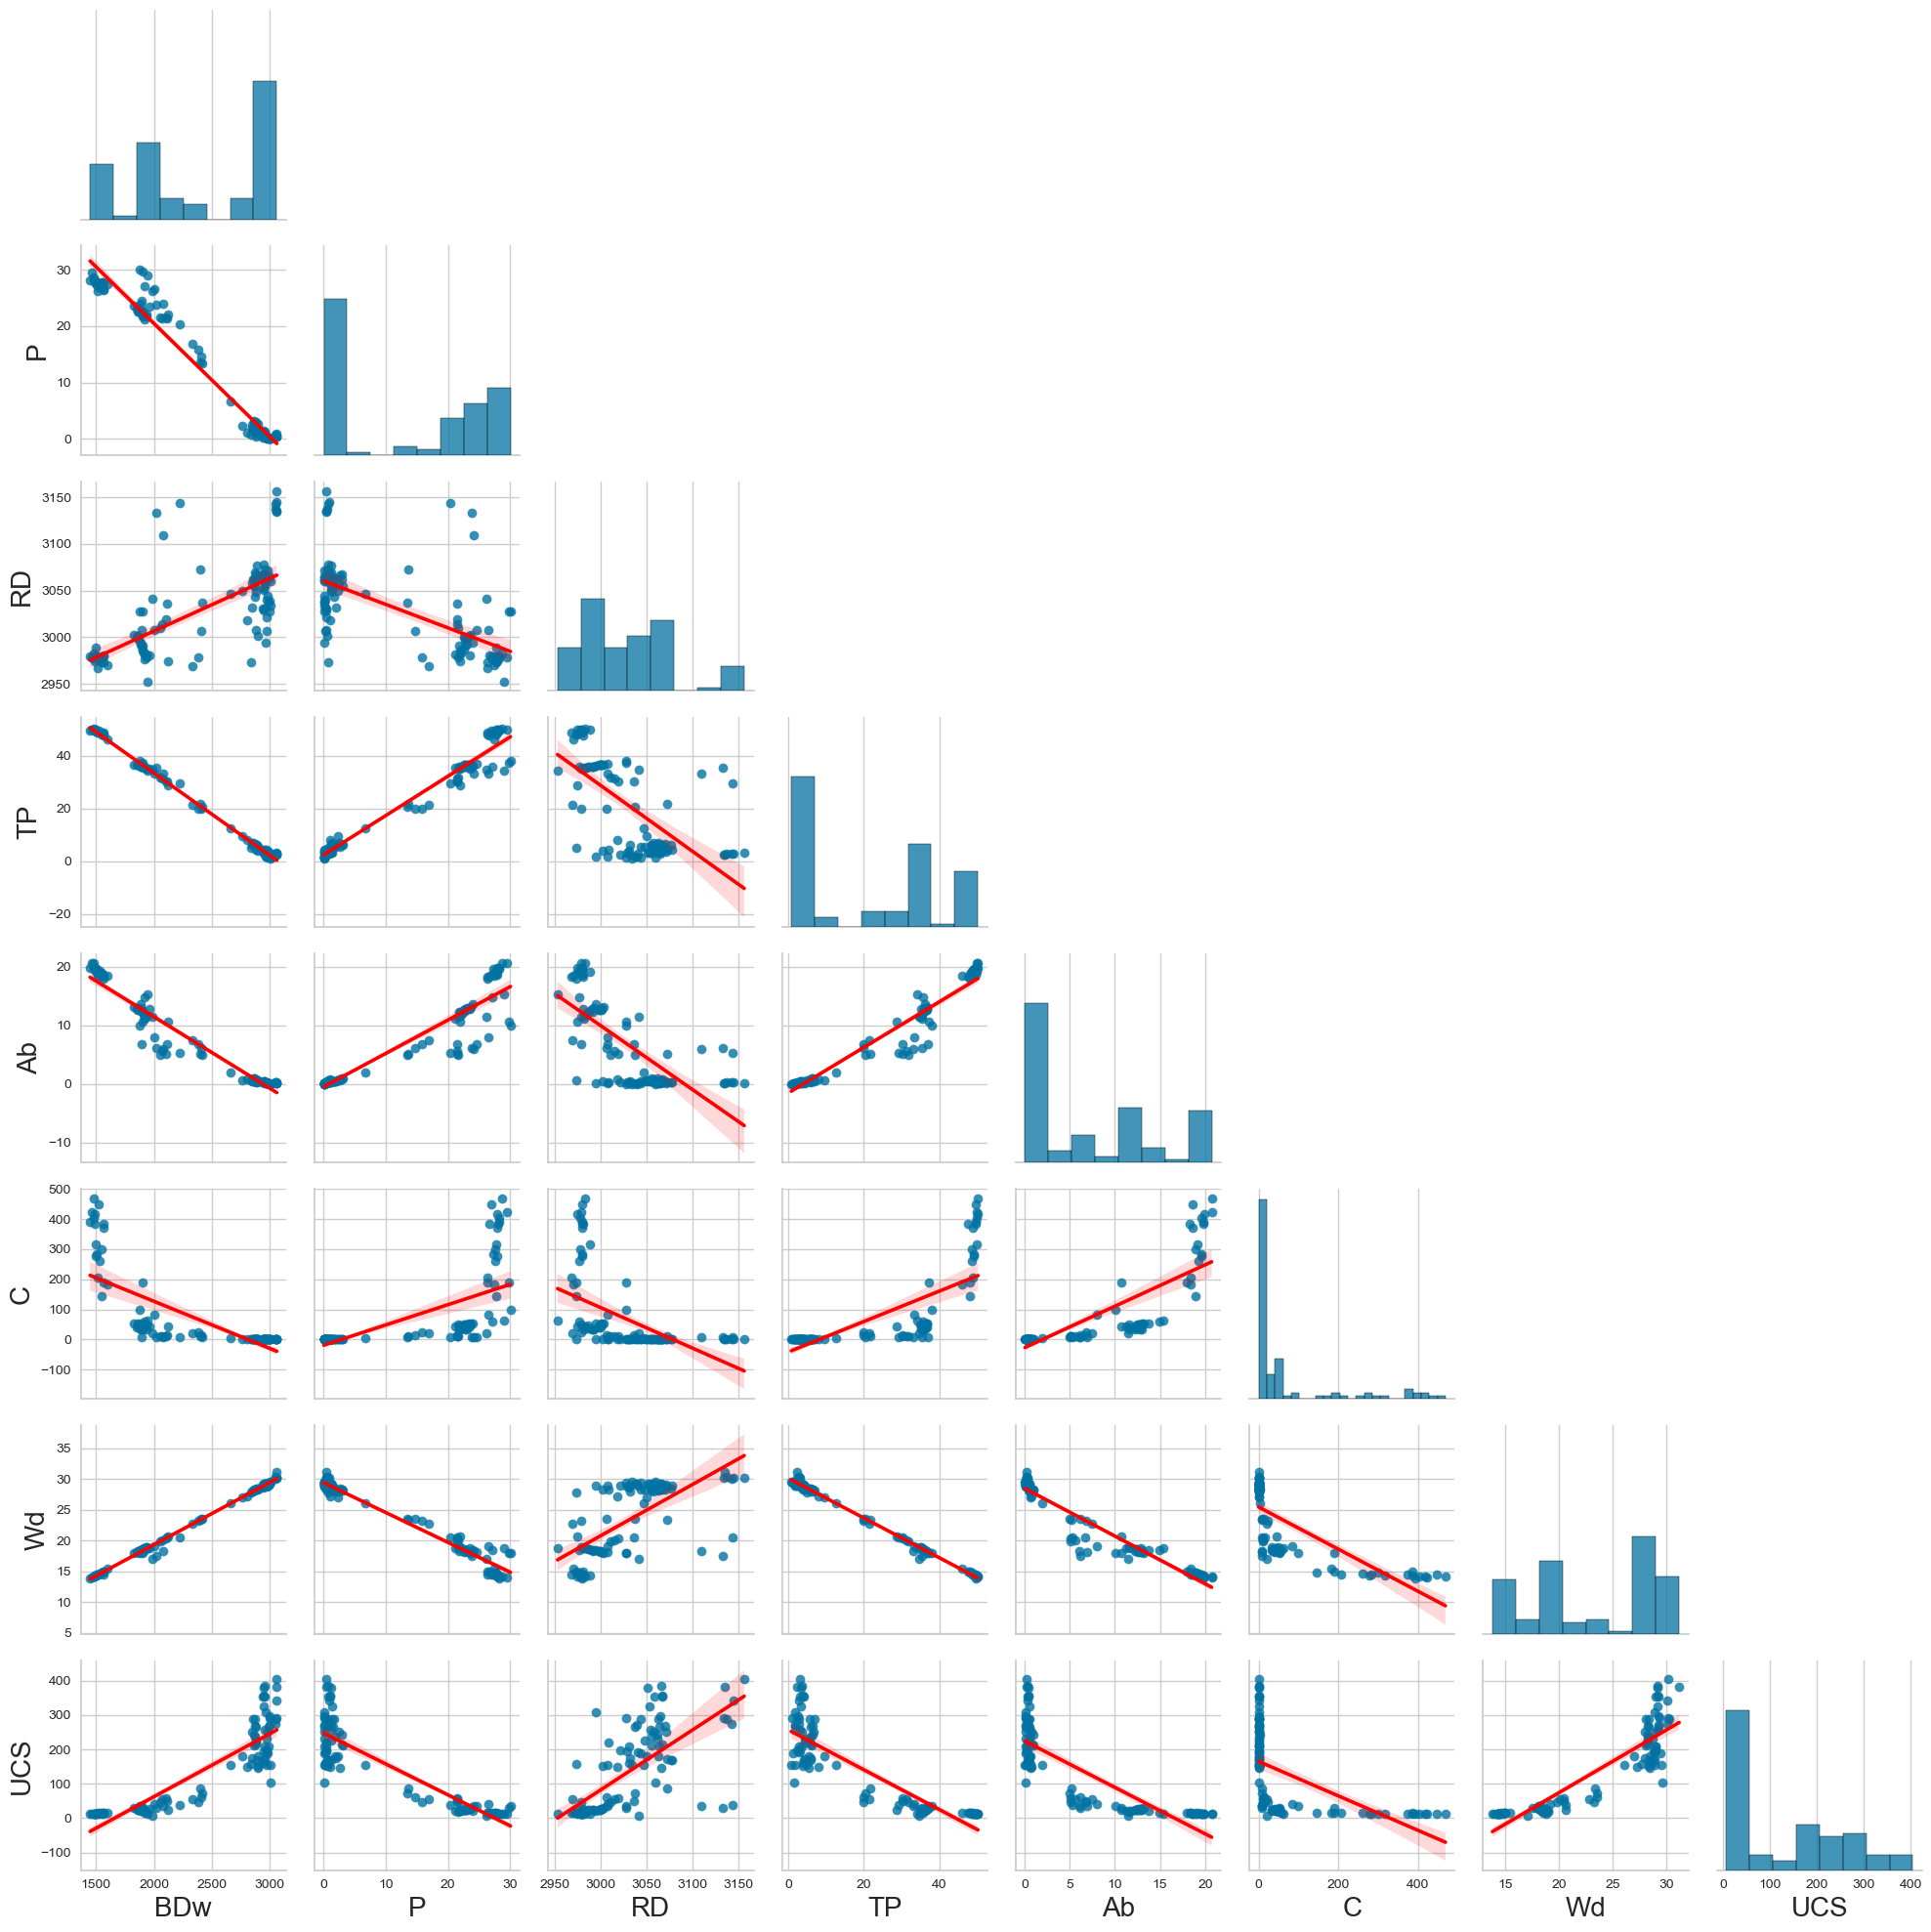

In [20]:
# Hide Input
# Setting the global font size
plt.rcParams.update({'font.size': 14})  # Set the global font size.

# Create the pairplot graph
custom_plot_kws = {"s": 20}  # Font size of the axes.
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(df_2.iloc[:,1:-1], kind="reg", corner=True,
                      plot_kws={'line_kws': {'color': 'red'}})

# Additional configuration if necessary
plt.grid(True)
plt.tight_layout()
plt.show()

## PCA plot
In the **Variable Factor Map**, Principal Component Analysis (PCA) can be easily explained. This tool facilitates the creation of PCA, a dimensionality reduction method used to decrease the dimensionality of large datasets. It transforms multiple features into a smaller number of new features while retaining most of the information and variability of the original data. When the number of features is 2, they can be visualized in a 2D plot, allowing us to observe how different features contribute to each new component.

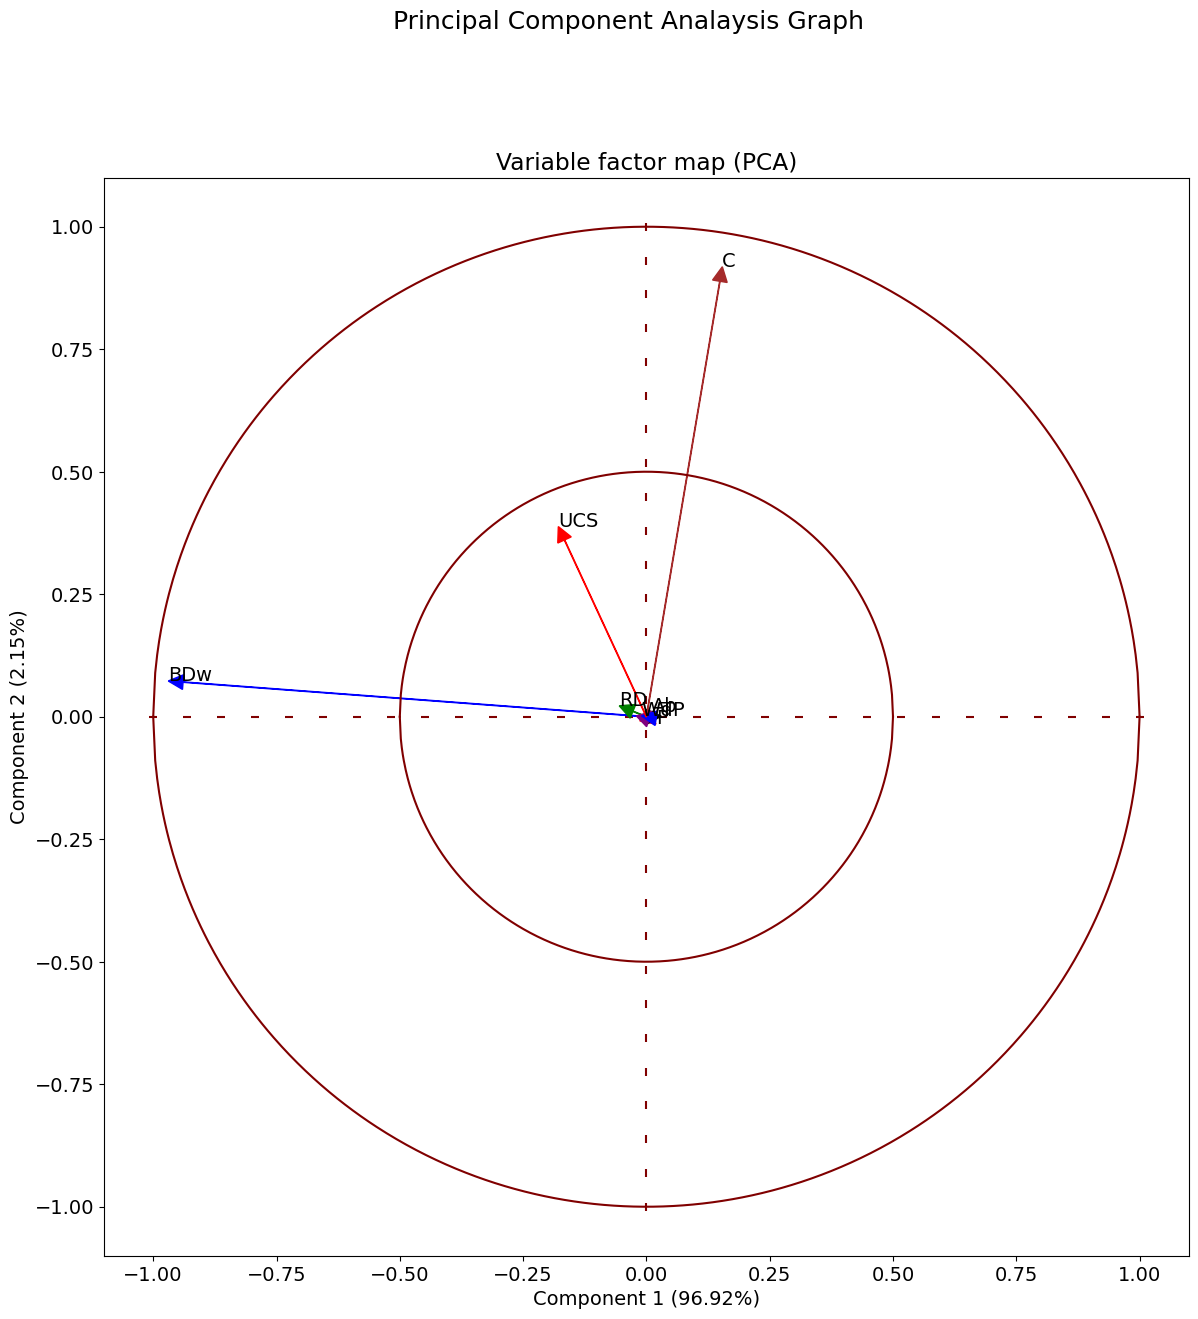

In [21]:
# Hide Input
#Construction of the PCA Plot
plt.rcdefaults()  # Reset to default values.

pca_map(df_2.iloc[:,1:-1], figsize=(14,14), sup="Principal Component Analaysis Graph", print_values= False);

In the top graph, the dimensionality is defined by three variables: C, BDw, and UCS. Towards the center of the graph, the remaining variables are visible. However, determining their importance order is challenging due to their relatively small magnitude compared to the principal components.

In the following section, we will remove the most significant variable to observe the subsequent variables of importance.

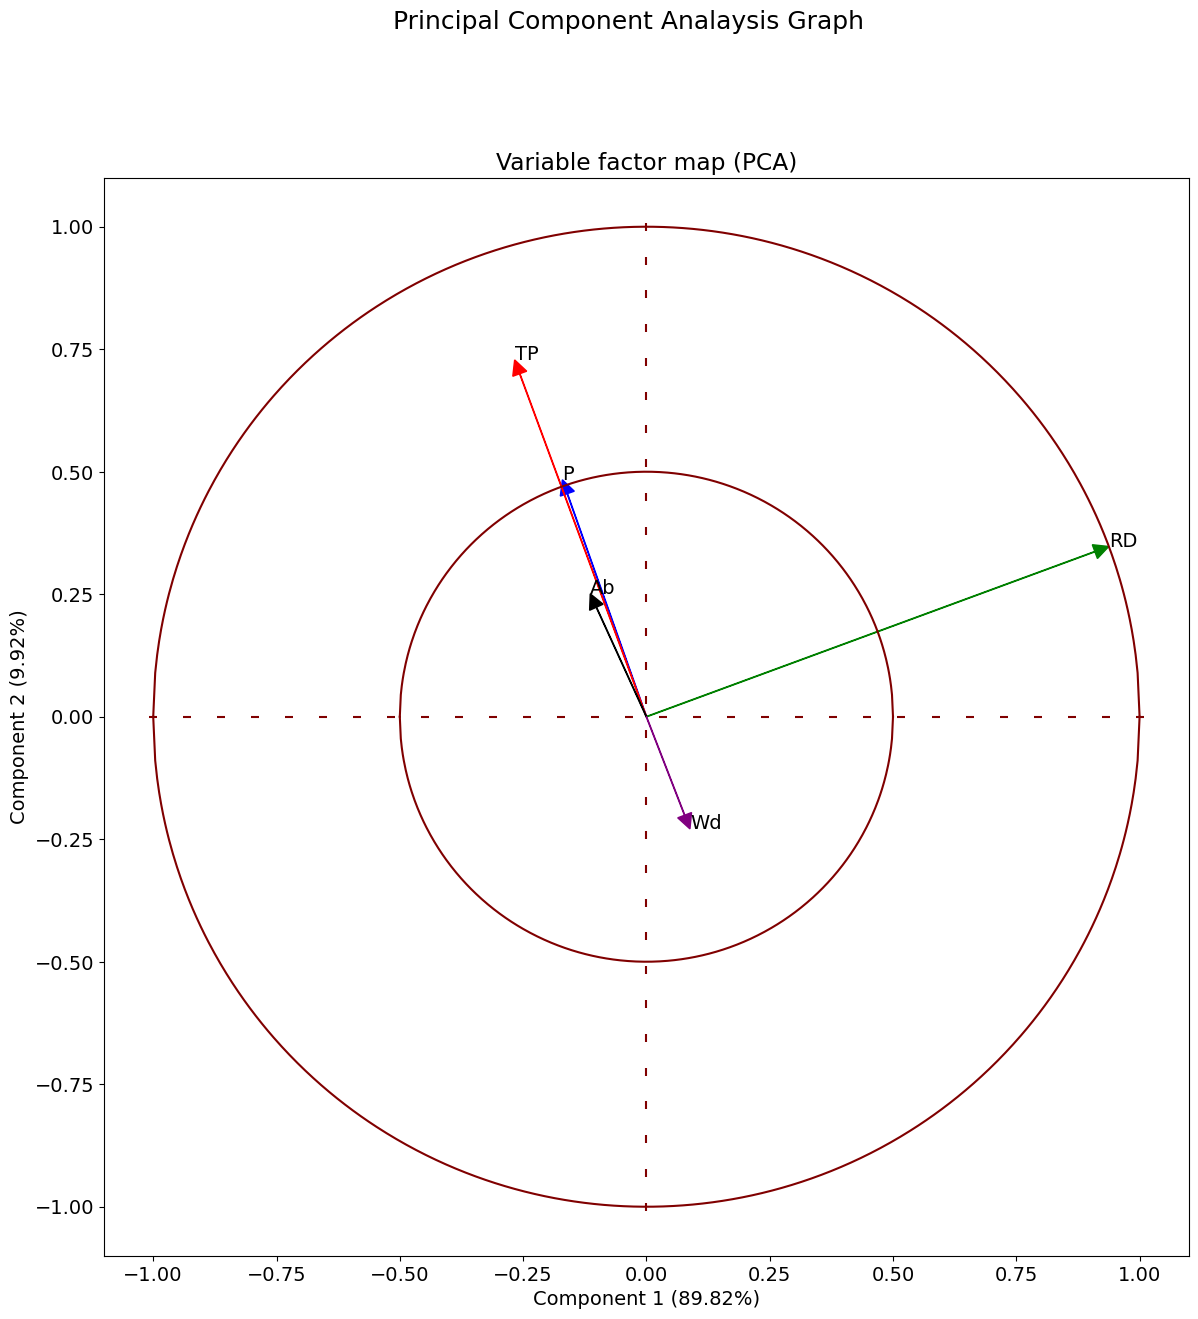

In [22]:
# Hide Input
#Removing the principal components to evaluate the contribution of the other variables
df_filtro = df_2[[ 'P', 'TP', 'RD', 'Ab', 'Wd']]

#PCA graph (df2)
pca_map(df_filtro, figsize=(14,14), sup="Principal Component Analaysis Graph", print_values= False);

TP, P, Ab, and Wb are correlated variables that define one dimension, while RD defines the other dimension.

## Cluster Analysis
In the next section, we will conduct a cluster analysis with the objective of separating Lapillistone from Basalt rocks using laboratory testing properties. To achieve this, we will utilize the elbow method to identify the number of clusters present in the sample.

The elbow method is a technique used to determine the optimal number of clusters in a dataset for clustering algorithms. It involves plotting the within-cluster sum of squares (WCSS) against the number of clusters and identifying the "elbow point" where the rate of decrease in WCSS slows down significantly. This point indicates the optimal number of clusters, as adding more clusters beyond this point does not significantly reduce WCSS.

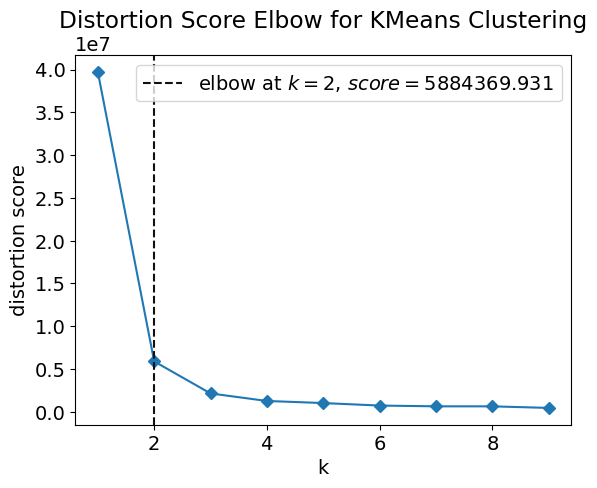

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Hide Input
#Elbow Method with the Yellowbrick library
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)
visualizer.fit(df_2.iloc[:,1:-1])
visualizer.show()

Yellowbrick uses the elbow method to determine the optimal number of clusters in clustering analysis techniques, such as those built using the K-Means algorithm. The elbow method is a heuristic technique based on observing how the intra-cluster variance varies with the number of clusters.

1. **Intra-cluster Variance (Inertia):** Intra-cluster variance, also known as inertia, measures how much points within each cluster are spread out. In the K-Means method, inertia is the sum of the squared distances of each point to the centroid of its cluster. The idea is that as we increase the number of clusters, intra-cluster variance tends to decrease because clusters are smaller and tend to fit the data better.

2. **Selection of the Number of Clusters:** The elbow method seeks the point at which the change in intra-cluster variance decreases significantly. The "elbow" in the graph is the point where the benefit of adding more clusters decreases, and the reduction in intra-cluster variance stabilizes.

3. **Implementation in Yellowbrick:** Yellowbrick facilitates the implementation of this method through the `KElbowVisualizer` visualization. By fitting this visualizer to a clustering model, such as K-Means, and providing a range of values for the number of clusters (`k`), the visualization will generate inertia plots for each `k` value. The elbow in the graph helps determine the optimal number of clusters.

In this sense, it can be appreciated that the methodology for analyzing the number of clusters supports what expert knowledge indicates; there are 2 types of rocks.

In [24]:
# StandardScaler is used to standardize the data.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_2.iloc[:,1:-1])

pca = PCA(n_components=2)  # Elige el número de componentes principales para el gráfico
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [25]:
# Get the matrix of rotated components.
rotational_matrix = pca.components_
# Create a DataFrame with the rotated component matrix.
column_names = [f'PC{i+1}' for i in range(rotational_matrix.shape[0])]
df_rotational_matrix = pd.DataFrame(rotational_matrix.T, columns=column_names)
col_name = pd.DataFrame(df_2.iloc[:,1:-1].columns)
col_name.columns = ['Variable']
df_rotational_matrix = pd.concat([col_name, df_rotational_matrix ], axis = 1)

df_rotational_matrix

Variable       PC1       PC2
0      BDw -0.381035 -0.002561
1        P  0.371282 -0.087710
2       RD -0.285863  0.453800
3       TP  0.379317  0.049119
4       Ab  0.375515  0.154953
5        C  0.294378  0.769238
6       Wd -0.379982  0.000753
7      UCS -0.345408  0.410141

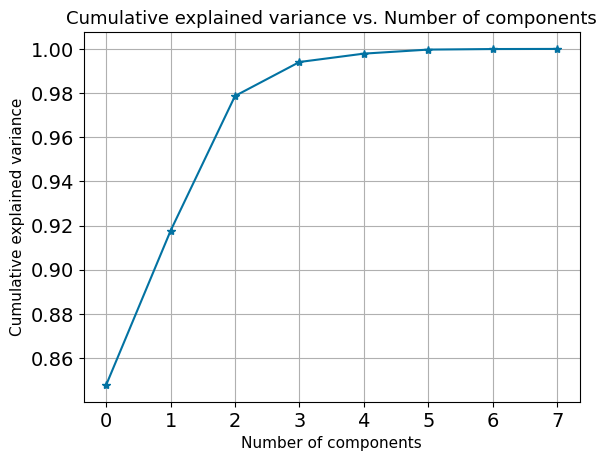

In [26]:
X_scaled=scaler.transform(df_2.iloc[:,1:-1])
 
#We instantiate a PCA object and apply it.
pca=PCA(n_components=8) 
pca.fit(X_scaled) # "Obtain the principal components."
X_pca=pca.transform(X_scaled) 

plt.plot(np.cumsum(pca.explained_variance_ratio_), '-*b')
plt.xlabel('Number of components',  fontsize = 11)
plt.ylabel('Cumulative explained variance',  fontsize = 11)
plt.title('Cumulative explained variance vs. Number of components', fontsize = 13)
plt.grid()
plt.show()

The cumulative variance plot indicates that by preserving $2$ components, **more than $95\%$ of the cumulative variance is preserved**. This suggests that reducing to 2 dimensions is feasible.

In [27]:
# Calcular la matriz de distancia
dist_matrix = linkage(X_scaled, method='ward')

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 25})

# Generar el dendrograma
plt.figure(figsize=(6, 18))
dendrogram(dist_matrix, labels=df['Sample'].values, leaf_rotation = 0,
           orientation="right", leaf_font_size=12)

# Personalizar el dendrograma
plt.title('Dendrogram', fontsize=14)
plt.xlabel('Observations', fontsize=12)
plt.ylabel('Distance', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Especifica una fuente diferente (por ejemplo, 'Helvetica')
plt.rcParams['font.family'] = 'Arial'

# Modificar estilos de fuente
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'normal'

# Mostrar el dendrograma
plt.tight_layout()
plt.show()

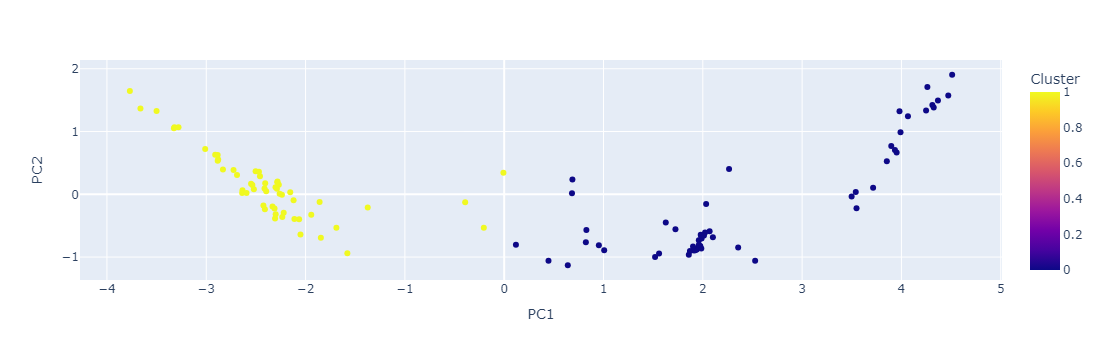

In [28]:
# Step 1: Normalization
np.random.seed(42) #Random seed for reproducible results.
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_2.iloc[:,1:-1])

# Step 2: Apply PCA
pca = PCA(n_components = 2)  # The desired number of principal components is specified.
principal_components = pca.fit_transform(normalized_data)

# Step 3: Unsupervised Clustering (K-means)
kmeans = KMeans(n_clusters=2, random_state=42)  # The number of clusters is specified based on previous analysis, 
# and a seed is set for reproducibility.

clusters = kmeans.fit_predict(principal_components)

# Step 4: Retrieve the cluster labels
cluster_labels = kmeans.labels_

# Step 5: Visualization with Plotly
df_2k = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_2k['Cluster'] = clusters

fig = px.scatter(df_2k, x='PC1', y='PC2', color='Cluster')
fig.show()

In [29]:
#The labeling process maintains the same order as the original DataFrame, and the names of the samples are incorporated.
df_2k['Facies'] = df_2.Facies
df_2k['Sample'] = df_2.Sample

In [30]:
# Step 6: Visualization with Plotly incorporating facies names.
fig = px.scatter(df_2k, x='PC1', y='PC2', color='Cluster', text='Facies')
fig.update_traces(textposition='top center')  # Place the sample names above the points.
fig.update_layout(title={'text': 'Component Analysis (PCA) and Clusters Visualization', 'x': 0.5}) 
fig.show()

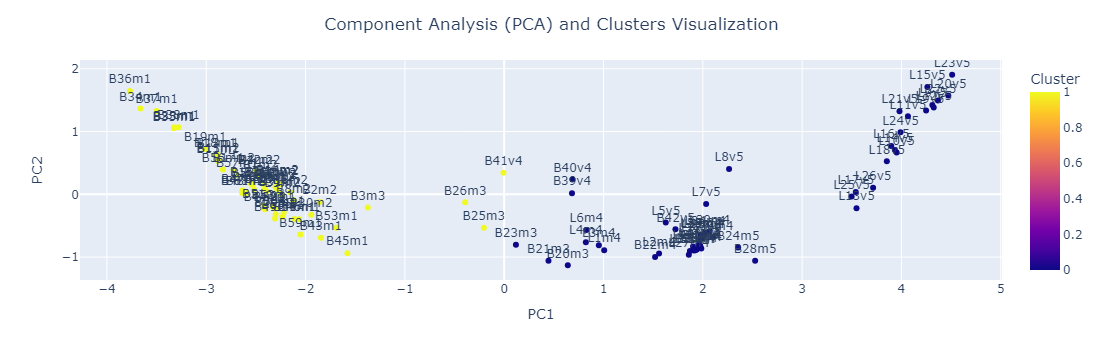

In [31]:
# Step 7: Visualization with Plotly incorporating Sample name.
fig = px.scatter(df_2k, x='PC1', y='PC2', color='Cluster', text='Sample')
fig.update_traces(textposition='top center')  # Place the sample names above the points.
fig.update_layout(title={'text': 'Component Analysis (PCA) and Clusters Visualization', 'x': 0.5}) 
fig.show()

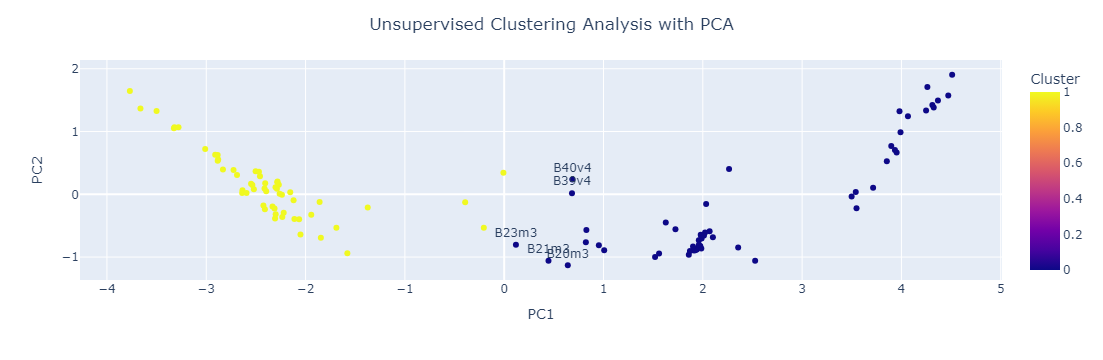

In [32]:
# A list will be constructed to only label some elements.
indices_a_etiquetar = [19, 20, 22, 38, 39]

# Visualization with Plotly incorporating facies names.
fig = px.scatter(df_2k, x='PC1', y='PC2', color='Cluster', text='Sample')

# Labels are assigned only to specific points, leaving the rest unlabeled.
fig.update_traces(textposition='top center')
fig.data[0].text = [facies if i in indices_a_etiquetar else None for i, facies in enumerate(df_2k['Sample'])]

fig.update_layout(title={'text': 'Unsupervised Clustering Analysis with PCA', 'x': 0.5}) 
fig.show()

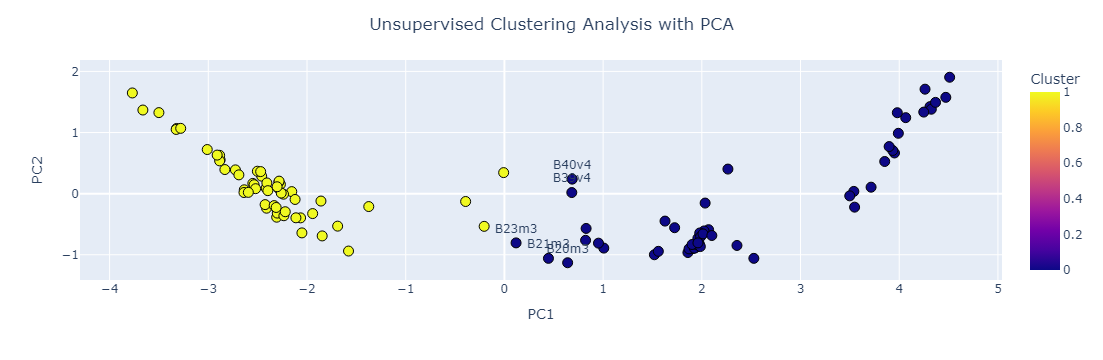

In [33]:
# A list will be constructed to only label some elements.
indices_a_etiquetar = [19, 20, 22, 38, 39]

# Visualization with Plotly incorporating facies names.
fig = px.scatter(df_2k, x='PC1', y='PC2', color='Cluster', text='Sample')

# Labels are assigned only to specific points, leaving the rest unlabeled.
fig.update_traces(textposition='top center', marker=dict(line=dict(color='black', width=1), size=10))
fig.data[0].text = [facies if i in indices_a_etiquetar else None for i, facies in enumerate(df_2k['Sample'])]

fig.update_layout(title={'text': 'Unsupervised Clustering Analysis with PCA', 'x': 0.5}) 
fig.show()

It can be observed that the unsupervised classification method has the ability to separate clusters whose Porosity values are at extreme values. However, when Basalt samples reach values close to the mean, the classification method loses its generalization ability and classifies them as Lapillistone.

## Analysis of Subgroup Boxplots
In this section, we will analyze the factors contributing to the incorrect classification of certain samples by the Machine Learning algorithm.

In [34]:
# Construction of new column using a pattern
df_2['Type'] = df_2['Sample'].str[-2]

In [35]:
# Mapping dictionary for texture type
mapeo = {'m': 'Massive', 'v': 'Vacuolar'} 

# Apply the mapping to the column
df_2['Type'] = df_2['Type'].map(mapeo)

In [36]:
# onstruction of new column using according to the last number
df_2['Porosity'] = df_2['Sample'].str.extract(r'(\d+)$')

In [37]:
# Mapping dictionary for porosity type
mapeo = {'1': 'very low porous', '2': 'low porous', '3': 'medium porous', '4': 'porous', '5': 'highly porous'} 

# Apply the mapping to the column
df_2['Porosity'] = df_2['Porosity'].map(mapeo)

In [38]:
#Basalts
basaltos = df_2[df_2['Facies'] == 'Basalts']
#Lapillistones
lapilli = df_2[df_2['Facies'] == 'Lapillistones ']

In [39]:
#Review of some samples
basaltos[basaltos['Sample'] == 'B40v4']

Sample          BDw          P           RD         TP        Ab         C  \
39  B40v4  2022.793487  23.823494  3133.766077  35.451676  6.214213  8.480493   

           Wd        UCS   Facies      Type Porosity  
39  17.528771  28.933609  Basalts  Vacuolar   porous

In [40]:
#Review of some samples
basaltos[basaltos['Sample'] == 'B39v4']

Sample          BDw          P           RD         TP        Ab         C  \
38  B39v4  2078.580559  24.050092  3109.733549  33.158886  6.053433  9.226326   

           Wd        UCS   Facies      Type Porosity  
38  18.309825  33.921507  Basalts  Vacuolar   porous

In [41]:
#Review of some samples
basaltos[basaltos['Sample'] == 'B23m3']

Sample          BDw          P           RD         TP        Ab         C  \
22  B23m3  2406.353447  14.643546  3006.630131  19.965099  6.206488  14.08955   

           Wd        UCS   Facies     Type       Porosity  
22  23.534817  62.238875  Basalts  Massive  medium porous

In [42]:
#Review of some samples
basaltos[basaltos['Sample'] == 'B21m3']

Sample          BDw          P           RD         TP        Ab  \
20  B21m3  2384.948279  15.838714  2979.001536  19.941355  6.777387   

            C         Wd        UCS   Facies     Type       Porosity  
20  23.356336  23.264597  47.761917  Basalts  Massive  medium porous

In [43]:
#Review of some samples
basaltos[basaltos['Sample'] == 'B20m3']

Sample          BDw          P          RD         TP        Ab          C  \
19  B20m3  2332.830336  16.930802  2969.46424  21.439352  7.458656  20.353141   

           Wd        UCS   Facies     Type       Porosity  
19  22.765495  55.795203  Basalts  Massive  medium porous

In [44]:
#Descriptive statistics of basalts
basaltos.describe()

BDw          P           RD         TP         Ab          C  \
count    64.000000  64.000000    64.000000  64.000000  64.000000  64.000000   
mean   2794.853251   4.697462  3053.047824   8.658074   1.893891   5.233312   
std     314.474907   8.100875    45.461627   9.937308   3.522146  12.298702   
min    1915.327104   0.017349  2952.738448   0.818626   0.033543   0.070000   
25%    2845.965008   0.401938  3030.570692   2.972872   0.195401   0.496912   
50%    2920.058629   0.980655  3054.851025   4.421056   0.461355   1.123366   
75%    2976.551538   2.634115  3067.350197   6.804483   0.781850   1.675587   
max    3060.390457  28.970662  3156.696042  35.654403  15.326997  62.996800   

              Wd         UCS  
count  64.000000   64.000000  
mean   27.269642  204.354304  
std     3.466772  104.901411  
min    17.020420    5.969138  
25%    27.920239  154.529354  
50%    28.522863  208.660168  
75%    29.179499  276.575942  
max    31.178474  404.858367

In [45]:
#Descriptive statistics of Lapillistones
lapilli.describe()

BDw          P           RD         TP         Ab           C  \
count    44.000000  44.000000    44.000000  44.000000  44.000000   44.000000   
mean   1758.264185  25.047159  2990.828697  40.896272  14.301910  160.606419   
std     213.161969   2.847629    16.530098   7.043138   4.680134  154.410597   
min    1448.645553  21.136031  2967.458572  30.221331   5.066569    7.508295   
25%    1529.087139  22.604671  2979.159389  35.694605  11.735141   40.712123   
50%    1860.482487  24.242528  2984.533249  36.690285  12.914001   53.195299   
75%    1901.745838  27.765940  3000.150077  48.952387  18.904159  287.060444   
max    2113.591764  30.032613  3036.242327  50.238270  20.728840  468.612410   

              Wd        UCS  
count  44.000000  44.000000  
mean   16.986392  23.253399  
std     2.172287  11.743021  
min    13.773140  11.930456  
25%    14.541206  13.802655  
50%    18.155090  21.265471  
75%    18.617823  25.972008  
max    20.436399  57.073446

In [46]:
#Construction of subgroups
basaltos_m = basaltos[basaltos['Type'] == 'Massive']
basaltos_v = basaltos[basaltos['Type'] == 'Vacuolar']

lapilli_m = lapilli[lapilli['Type'] == 'Massive']
lapilli_v = lapilli[lapilli['Type'] == 'Vacuolar']

## Boxplot for basalts

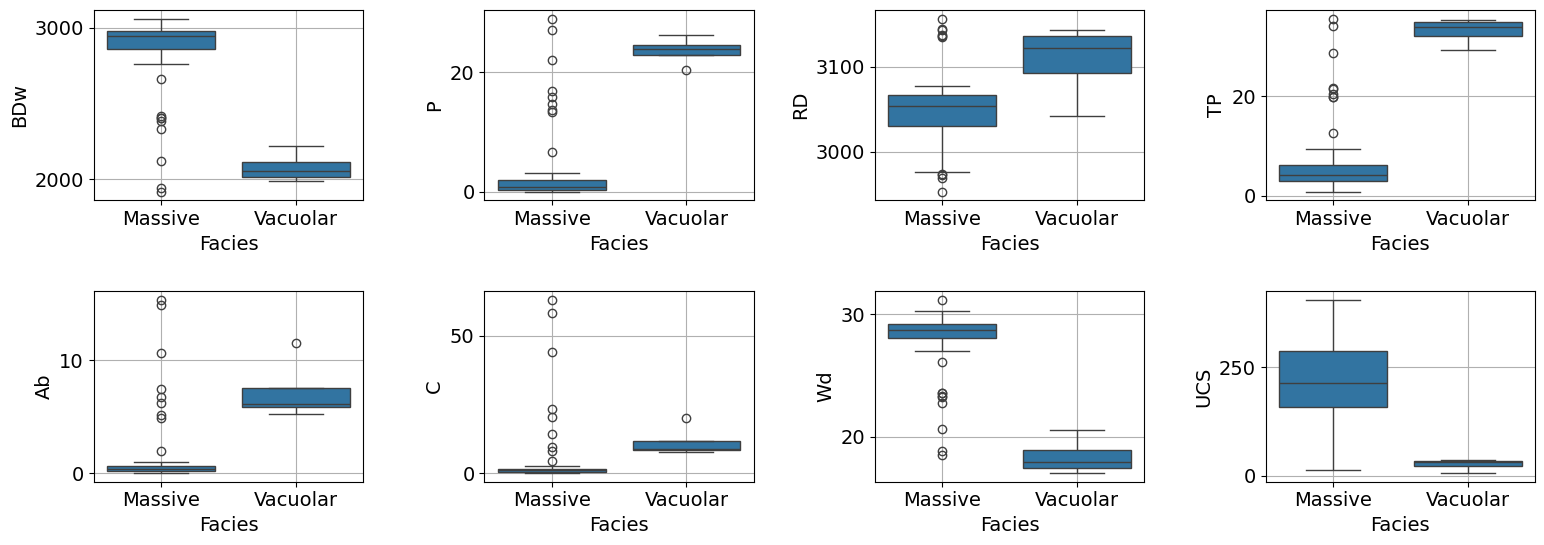

In [47]:
# Boxplots
plt.rcParams['font.family'] = 'sans-serif'
data = basaltos.iloc[:,1:-3]

# Create the boxplots in a 3x4 subplot
plt.figure(figsize=(16, 6))
variable = list(data.columns)


for i, j in enumerate(variable):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=data, x=df_2["Type"], y=j)
    plt.ylabel(j)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #Adjust the font size of axis titles
    plt.xlabel('Facies', fontsize=14)  # Adjust the font size and x-axis title
    plt.ylabel(j,fontsize=14)  # Adjust the font size and y-axis title
    plt.grid()

#Adjust margins and spacing between subplots
plt.tight_layout()

# Save the graph
plt.savefig('boxplots_basaltos.png', bbox_inches='tight')
plt.show()

## Boxplot for Lapillistones

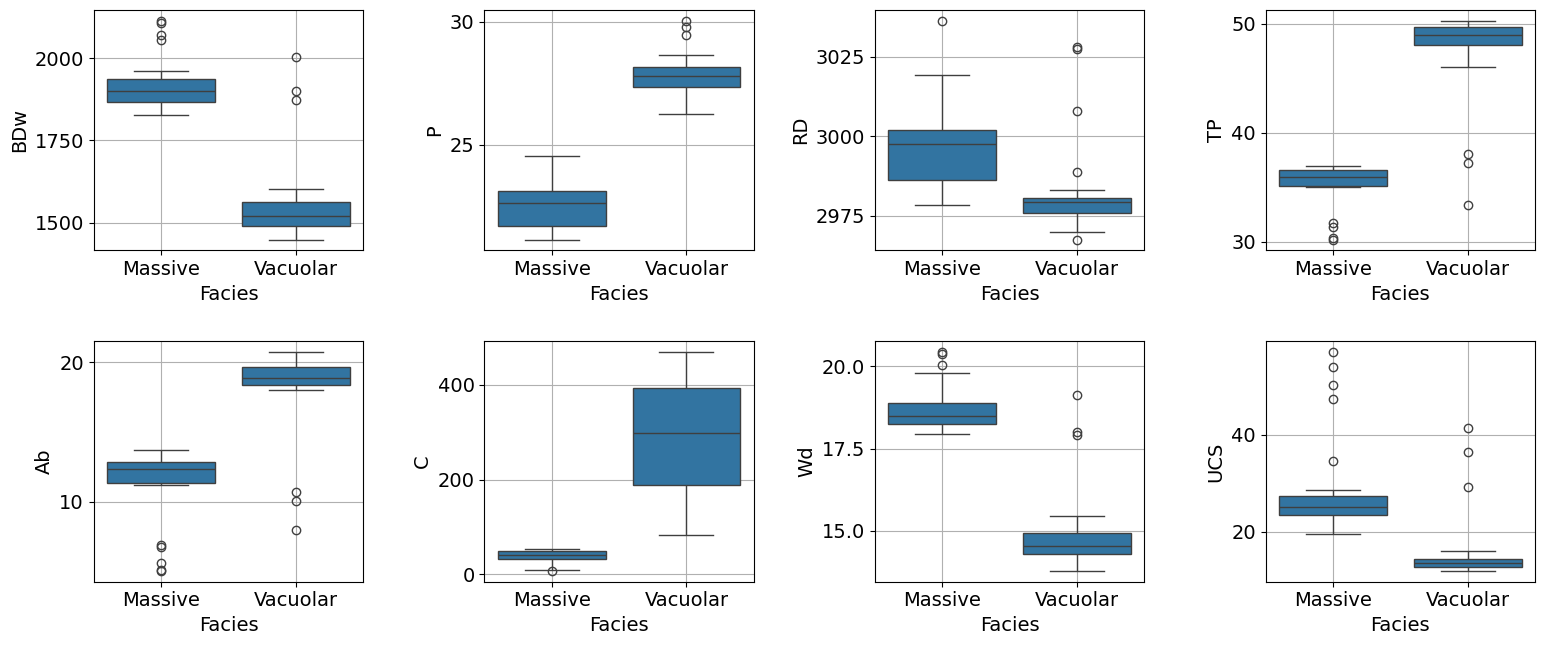

In [48]:
# Boxplots
plt.rcParams['font.family'] = 'sans-serif'
data = lapilli.iloc[:,1:-3]

# Create the boxplots in a 3x4 subplot
plt.figure(figsize=(16, 7))
variable = list(data.columns)


for i, j in enumerate(variable):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=data, x=df_2["Type"], y=j)
    plt.ylabel(j)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    #Adjust the font size of axis titles
    plt.xlabel('Facies', fontsize=14)  # Adjust the font size and x-axis title
    plt.ylabel(j,fontsize=14)  # Adjust the font size and y-axis title
    plt.grid()

#Adjust margins and spacing between subplots
plt.tight_layout()

# Save  the graph
plt.savefig('boxplots_lapilli.png', bbox_inches='tight')
plt.show()

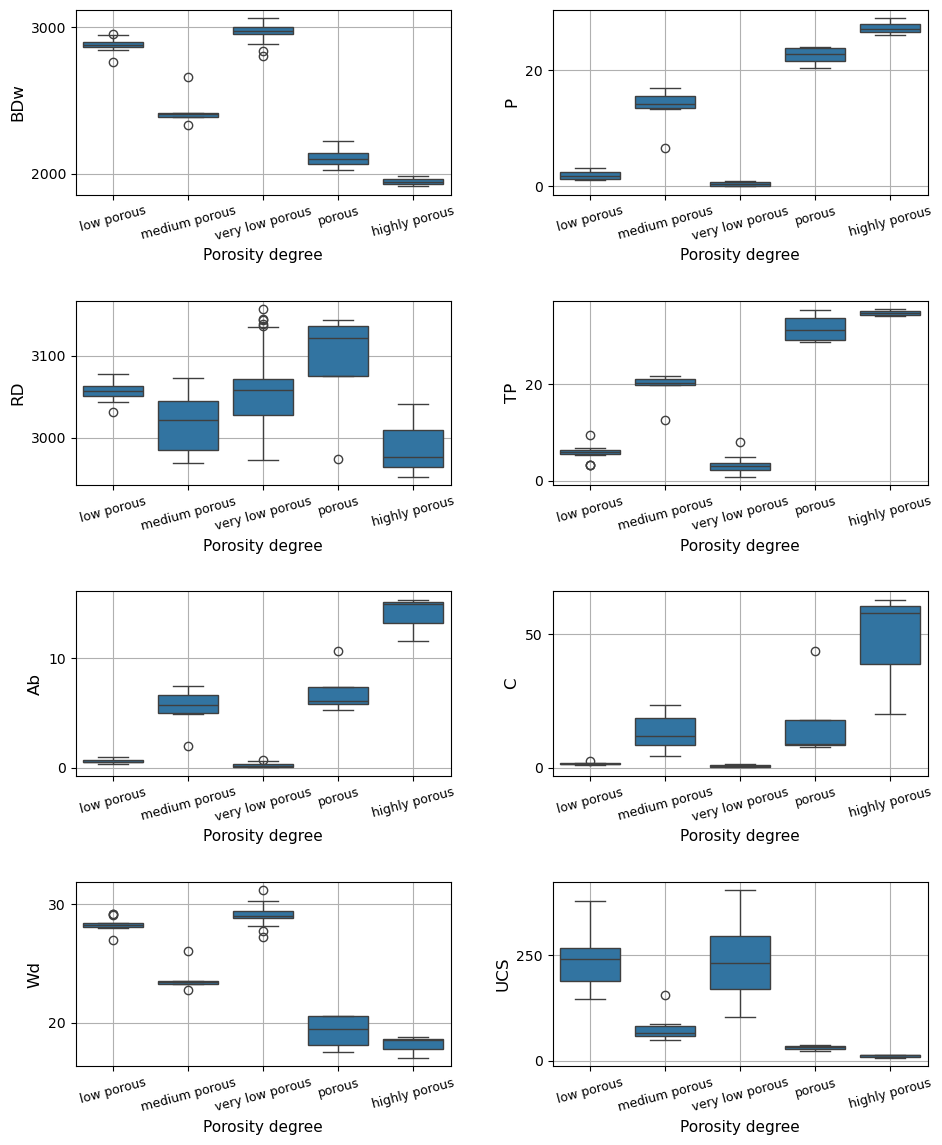

In [49]:
#Boxplot basalts/porosidad
plt.rcParams['font.family'] = 'sans-serif'
data = basaltos.iloc[:,1:-3]

# Create the boxplots in a 3x4 subplot
plt.figure(figsize=(10, 12))
variable = list(data.columns)


for i, j in enumerate(variable):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=data, x=df_2["Porosity"], y=j)
    plt.ylabel(j)
    plt.xticks(fontsize=9,  rotation=15)
    plt.yticks(fontsize=10)
    #Adjust the font size of axis titles
    plt.xlabel('Porosity degree', fontsize=11)  # Adjust the font size and x-axis title
    plt.ylabel(j,fontsize=12)  # Adjust the font size and y-axis title
    plt.grid()

#Adjust margins and spacing between subplots
plt.tight_layout()

# Save the boxplot
plt.savefig('boxplots_basaltos_porosidad.png', bbox_inches='tight')
plt.show()

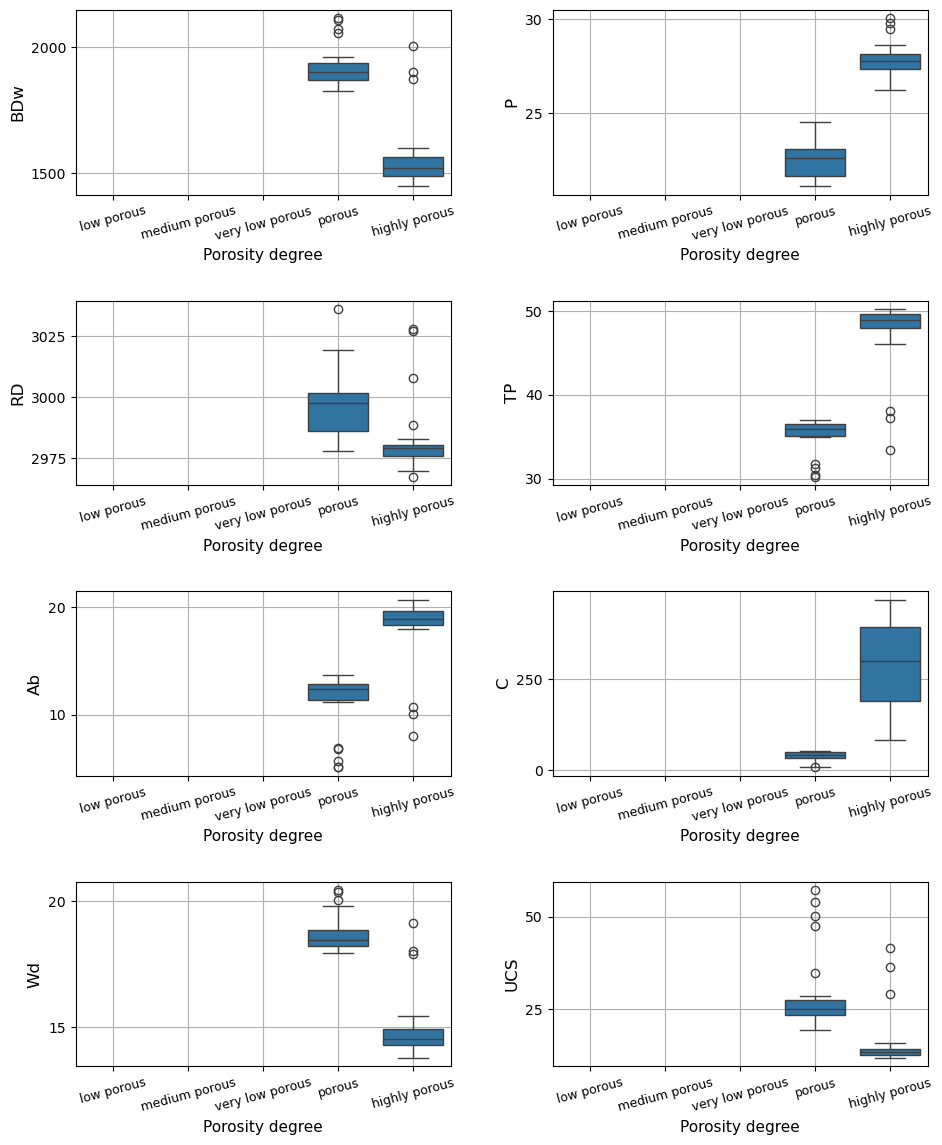

In [50]:
#Boxplot lapilli/porosidad
plt.rcParams['font.family'] = 'sans-serif'
data = lapilli.iloc[:,1:-3]

# Adjust the font size of axis titles
plt.figure(figsize=(10, 12))
variable = list(data.columns)


for i, j in enumerate(variable):
    plt.subplot(4, 2, i+1)
    sns.boxplot(data=data, x=df_2["Porosity"], y=j)
    plt.ylabel(j)
    plt.xticks(fontsize=9,  rotation=15)
    plt.yticks(fontsize=10)
    #Adjust the font size of axis titles
    plt.xlabel('Porosity degree', fontsize=11)  # Adjust the font size and x-axis title
    plt.ylabel(j,fontsize=12)  # Adjust the font size and y-axis title
    plt.grid()

#Adjust margins and spacing between subplots
plt.tight_layout()

# Sabe the boxplot
plt.savefig('boxplots_lapilli_porosidad.png', bbox_inches='tight')
plt.show()

## Descriptive Statistics

In [51]:
#Descriptive Statistics of Basalts
basaltos.describe()

BDw          P           RD         TP         Ab          C  \
count    64.000000  64.000000    64.000000  64.000000  64.000000  64.000000   
mean   2794.853251   4.697462  3053.047824   8.658074   1.893891   5.233312   
std     314.474907   8.100875    45.461627   9.937308   3.522146  12.298702   
min    1915.327104   0.017349  2952.738448   0.818626   0.033543   0.070000   
25%    2845.965008   0.401938  3030.570692   2.972872   0.195401   0.496912   
50%    2920.058629   0.980655  3054.851025   4.421056   0.461355   1.123366   
75%    2976.551538   2.634115  3067.350197   6.804483   0.781850   1.675587   
max    3060.390457  28.970662  3156.696042  35.654403  15.326997  62.996800   

              Wd         UCS  
count  64.000000   64.000000  
mean   27.269642  204.354304  
std     3.466772  104.901411  
min    17.020420    5.969138  
25%    27.920239  154.529354  
50%    28.522863  208.660168  
75%    29.179499  276.575942  
max    31.178474  404.858367

In [52]:
#Descriptive Statistics of Lapillistones
lapilli.describe()

BDw          P           RD         TP         Ab           C  \
count    44.000000  44.000000    44.000000  44.000000  44.000000   44.000000   
mean   1758.264185  25.047159  2990.828697  40.896272  14.301910  160.606419   
std     213.161969   2.847629    16.530098   7.043138   4.680134  154.410597   
min    1448.645553  21.136031  2967.458572  30.221331   5.066569    7.508295   
25%    1529.087139  22.604671  2979.159389  35.694605  11.735141   40.712123   
50%    1860.482487  24.242528  2984.533249  36.690285  12.914001   53.195299   
75%    1901.745838  27.765940  3000.150077  48.952387  18.904159  287.060444   
max    2113.591764  30.032613  3036.242327  50.238270  20.728840  468.612410   

              Wd        UCS  
count  44.000000  44.000000  
mean   16.986392  23.253399  
std     2.172287  11.743021  
min    13.773140  11.930456  
25%    14.541206  13.802655  
50%    18.155090  21.265471  
75%    18.617823  25.972008  
max    20.436399  57.073446

## Parallel Coordinates Plot
A Parallel Coordinate Plot is a visualization technique used to display multivariate data. In this plot, each variable is represented by a vertical axis, and lines connect points corresponding to individual data instances across these axes. 

The utility of a Parallel Coordinate Plot lies in its ability to compare trends and patterns in variables across different categories or clusters. It helps in visually identifying clusters or groups within the data and understanding how variables contribute to the separation or grouping of data points. This plot is particularly useful for exploring relationships and patterns in datasets with multiple variables and identifying variables that are significant for distinguishing different groups or clusters.

In [53]:
# Representation of the variables and their clusters

from pandas.plotting import parallel_coordinates
X_clustered = pd.DataFrame(normalized_data, index=df_2.index, columns=df_2.iloc[:,1:-3].columns)
X_clustered["cluster"] = cluster_labels

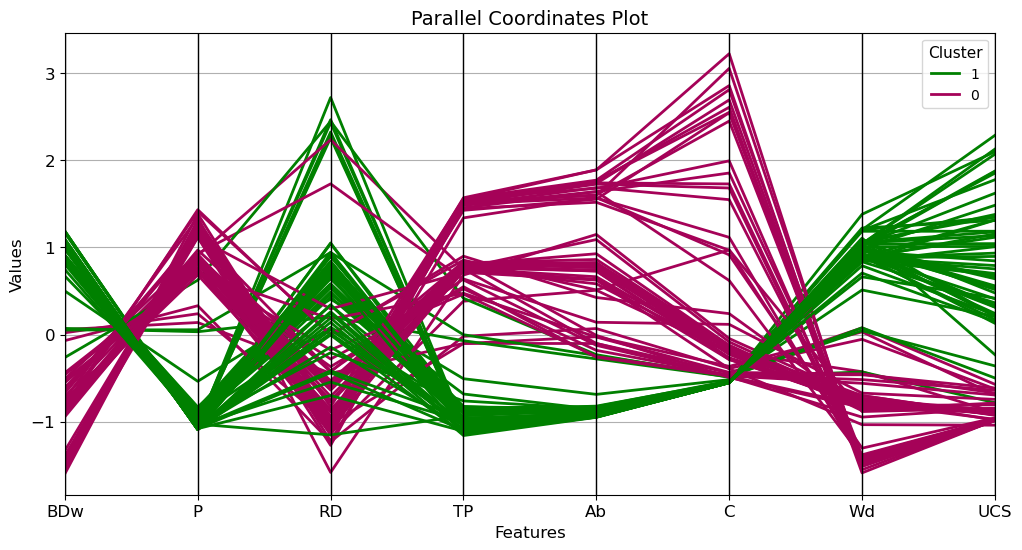

In [54]:
# Create a Parallel Coordinate Plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(X_clustered, 'cluster', color=('green', 'm'), linewidth=2)

# Add legend with font size adjustment for title
legend = plt.legend(title='Cluster', fontsize=10)

# Adjust legend title size
legend.get_title().set_fontsize(11)  

# Adjust the font size after creating the chart
plt.title('Parallel Coordinates Plot', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(fontsize=12)  # Font size for x-axes
plt.yticks(fontsize=12)  # Font size for y-axes

# Show the graph
plt.show()

When using a Parallel Coordinates Plot to evaluate how a variable influences the clustering process, the plot aids in comparing trends and patterns in variables across different clusters. This type of plot is especially useful when working with datasets that have multiple variables and you want to understand how these variables behave in relation to cluster formation.

The **Parallel Coordinate Plot** illustrates that Cluster 0 is predominantly influenced by P, TP, and C. Conversely, Cluster 1 is primarily characterized by BDw, RD, Wd, and UCS.

In both scenarios, the variables RD and BDw exhibit the highest effect sizes. However, the effect size of RD is greater in lapillistones than in basalts. Conversely, BDw is greater in basaltic rocks than in lapillistones.

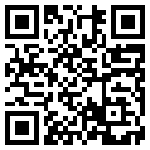

In [55]:
# Transform URL to QR Cose
url = "https://github.com/mezaacor/EUROCK2024"

# Generate QR Code
qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=1,border=1)
qr.add_data(url)
qr.make(fit=True)

# Crear una imagen del código QR
img = qr.make_image(fill_color="black", back_color="white")

# Adjust image size
img = img.resize((150, 150), PilImage.LANCZOS)

# Save the QR image
img.save("codigo_qr.png")

# Show the QR image
display(Image(filename="codigo_qr.png"))